The ‘doing good while doing well’ view indicates a positive relationship between social and financial performance and suggests superior returns from choosing high-rated stocks. 

 The ‘doing good but not well’ point of view suggests a negative relationship that is linked to the ‘managerial opportunism hypothesis’ or the ‘trade-off theory’. Thus, this line of argument suggests the superiority of low-rated firms. 
 
 Is this affected by the industry. Certain industry doing good whie doing well - tech?. Other industry dong good but not doing well - oil & gas?
 
 Does it do better during a specific time period. During a recession/economic downturn- people want safer stocks? Does that mean esg stocks are preferred because better governments? Or not preferred - trade off theory - lost of resources.
 
 Research on the financial benefits of SRI mainly concentrates on comparing the performance of socially responsible mutual funds
to the performance of unrestricted benchmark portfolios or conventional funds (see Renneboog et al., 2008a, for a review of this
vast literature). The overall findings of these studies covering most markets of the world suggest that the risk-adjusted returns for investing in SRI funds do not appear to be significantly different from conventional fund returns

How to measure financial performance?
Third, most studies rely on funds’ alphas to measure their risk-adjusted performance. This is problematic for several reasons.
The first reason is that Jensen’s alpha is an appropriate measure of portfolio performance for investors that are well diversified and, therefore, are primarily concerned with their exposure to market (systematic) risk (see Eling & Schuhmacher, 2007). However, if SRI screens restrict the investment universe, investors may inadvertently subject themselves to otherwise diversifiable (unsystematic) risk. In this case, it is more reasonable to use a performance measure based on total risk, rather than market risk

We leave the boundaries of an alpha-based performance evaluation by applying the Sharpe ratio. This simple and most frequently used reward-to-risk ratio measures the average premium per unit of total risk and therefore is adequate for less than well diversified investors It has a decision-theoretic foundation under a wide range of (skewed and fat-tailed) non-normal distributions (see Schuhmacher & Eling, 2011, 2012) and the significance of performance differences can be tested using state-of-the-art bootstrap methods that are robust to typical features of financial time series like non-normality and serial correlation

From S&P500, there are esg data for 328 stocks in spEnv dataframe.

From S&P500, there are industry data for 500 stocks in spIndustry using GIC Sectors

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

spEnv = pd.read_excel(r'C:\Users\huang\Documents\esg\esgCheck.xlsx')
spIndustry = pd.read_excel(r'C:\Users\huang\Documents\esg\s&pIndustry.xlsx')
#pd.set_option('display.max_rows', 500)
spIndustry.drop(['Global_Company_Key','Data_Year_-_Fiscal', 'Data_Date', 'Industry_Format', 'Level_of_Consolidation_-_Company_Annual_Descriptor', 'Population_Source', 'Data_Format'], inplace=True, axis=1)
spIndustry.drop_duplicates(keep='first', inplace=True)
spEnv

Organization ID  Fiscal_Year  OVerall_Score  Economic_Score  \
0               10625         2012       0.903136        0.691096   
1               10625         2018       0.925016        0.961376   
2               10625         2016       0.947315        0.955375   
3               10625         2019       0.821133        0.265033   
4               10625         2011       0.955718        0.898867   
...               ...          ...            ...             ...   
3749        119901881         2014       0.473015        0.184984   
3750        119901881         2013       0.476370        0.443578   
3751        119901881         2012       0.599010        0.701873   
3752        119901881         2011       0.532595        0.525273   
3753        119901881         2010       0.470021        0.326501   

      Environmental_Score  Corporate_Governance_Score  Social_Score Ticker  
0                0.868136                    0.788041      0.933856     DE  
1                0.948539                    0.504560      0.906080     DE  
2                0.928867                    0.845178      0.911892     DE  
3                0.930694                    0.613558      0.954296     DE  
4                0.911706                    0.934404      0.940291     DE  
...                   ...                         ...           ...    ...  
3749             0.735990                    0.286304      0.736497    APA  
3750             0.677600                    0.258232      0.570717    APA  
3751             0.789849                    0.174677      0.587185    APA  
3752             0.808546                    0.220318      0.527905    APA  
3753             0.667034                    0.486223      0.445279    APA  

[3754 rows x 8 columns]

In [2]:
spIndustry

Ticker                  Company Name ISO Currency Code  \
0       AAL   AMERICAN AIRLINES GROUP INC               USD   
12      PNW    PINNACLE WEST CAPITAL CORP               USD   
24      ABT           ABBOTT LABORATORIES               USD   
36      AMD        ADVANCED MICRO DEVICES               USD   
48      APD  AIR PRODUCTS & CHEMICALS INC               USD   
...     ...                           ...               ...   
6947   FBHS   FORTUNE BRANDS HOME & SECUR               USD   
6959    XYL                     XYLEM INC               USD   
6971   CBRE                CBRE GROUP INC               USD   
6995    LYB  LYONDELLBASELL INDUSTRIES NV               USD   
7007   ALLE                  ALLEGION PLC               USD   

     Active/Inactive Status Marker  GIC Groups  GIC Industries  GIC_Sectors  \
0                                A        2030          203020           20   
12                               A        5510          551010           55   
24                               A        3510          351010           35   
36                               A        4530          453010           45   
48                               A        1510          151010           15   
...                            ...         ...             ...          ...   
6947                             A        2010          201020           20   
6959                             A        2010          201060           20   
6971                             A        6010          601020           60   
6995                             A        1510          151010           15   
7007                             A        2010          201020           20   

      GIC Sub-Industries  
0               20302010  
12              55101010  
24              35101010  
36              45301020  
48              15101040  
...                  ...  
6947            20102010  
6959            20106020  
6971            60102040  
6995            15101010  
7007            20102010  

[503 rows x 8 columns]

From Stoxx50, there are esg data for 2 stocks in spEnv dataframe.

From Stoxx50, there are industry data for 36 stocks in spIndustry using GIC Sectors

In [3]:
stxEnv = pd.read_excel(r'C:\Users\huang\Documents\esg\stoxxIndust.xlsx')
#stxIndustry = pd.read_excel(r'C:\Users\huang\Documents\esg\s&pIndustry.xlsx')

## Calculating excess return, market value, book-to-market

### 1) Market Value

In [4]:
mv = pd.read_excel(r'C:\Users\huang\Documents\esg\esg_industry&price.xlsx')
mv = mv[['Fiscal_Year', 'Ticker', 'Company_Name', 'Market_Value_-_Total_-_Fiscal']]
resMV = mv.groupby(['Ticker'], as_index=False).agg(
                      {'Market_Value_-_Total_-_Fiscal':['mean','std']})
resMV
# For every ticker, it calculates the market_value mean and market_value std

Ticker Market_Value_-_Total_-_Fiscal               
                                    mean            std
0        A                  20343.751908   10340.955417
1      AAL                  14196.920708   11695.546782
2      AAP                   9516.949275    3193.170671
3     AAPL                 885681.302775  638397.977017
4     ABBV                 136986.651589   50701.719795
..     ...                           ...            ...
495    YUM                  29709.192500    4758.822648
496    ZBH                  20249.709917    7490.350129
497   ZBRA                   8425.794950    9266.547491
498   ZION                   6663.889283    2247.071844
499    ZTS                  46789.012411   32885.011227

[500 rows x 3 columns]

# 2) Calculating the return and the alpha

### Calculating the return of s&p500 index

In [5]:
spIndex = pd.read_excel(r'C:\Users\huang\Documents\esg\final_s&pIndex.xlsx')
spIndex

from numpy import nan

#Calculate the returns of the index with the price_close
for i in range(1, len(spIndex)):
    spIndex.loc[i, 'S&P_return'] = spIndex.loc[i, 'Price_Close_Monthly']/spIndex.loc[i-1, 'Price_Close_Monthly']-1
        
spIndexRet = spIndex

#Remove the first row- the row where the return is NAN because there is no previous price_close to calculate return
spIndexRet = spIndexRet.iloc[1: , :]
spIndexRet 

Global Index Key - Index Monthly  Price_Close_Monthly Fiscal_Monthly  \
1                                   3              1104.49        02-2010   
2                                   3              1169.43        03-2010   
3                                   3              1186.69        04-2010   
4                                   3              1089.41        05-2010   
5                                   3              1030.71        06-2010   
..                                ...                  ...            ...   
145                                 3              4373.94        02-2022   
146                                 3              4530.41        03-2022   
147                                 3              4131.93        04-2022   
148                                 3              4132.15        05-2022   
149                                 3              3785.38        06-2022   

           Index Name Index Code Type Ticker  S&P_return  
1    S&P 500 Comp-Ltd           LGCAP  I0003    0.028514  
2    S&P 500 Comp-Ltd           LGCAP  I0003    0.058796  
3    S&P 500 Comp-Ltd           LGCAP  I0003    0.014759  
4    S&P 500 Comp-Ltd           LGCAP  I0003   -0.081976  
5    S&P 500 Comp-Ltd           LGCAP  I0003   -0.053882  
..                ...             ...    ...         ...  
145  S&P 500 Comp-Ltd           LGCAP  I0003   -0.031361  
146  S&P 500 Comp-Ltd           LGCAP  I0003    0.035773  
147  S&P 500 Comp-Ltd           LGCAP  I0003   -0.087957  
148  S&P 500 Comp-Ltd           LGCAP  I0003    0.000053  
149  S&P 500 Comp-Ltd           LGCAP  I0003   -0.083920  

[149 rows x 7 columns]

ISSUE: 
s&p are always reshuffled to better track the us economy. Companies can become private or drop in value. Leading to new stocks being added to replace them- not necessarily because they become better financially. The S&P database thus have more than 500 stocks because they are there 1 point or the other. We care about stocks that lasted longer. Arbitrarily 148 months, there is 448 stocks. All have ranges 2010-2022

spRet has 448 stocks and all those 448 stocks have ranges 2010-2022

In [6]:
pCloseMonth = pd.read_excel(r'C:\Users\huang\Documents\esg\final_s&pPriceClosedMonthly.xlsx')
pCloseMonth = pCloseMonth[["Fiscal_Monthly", "Ticker", "Company_Name", "Price_Close_-_Monthly", "Fiscal_Year"]]
#pCloseMonth

#monthly price closes for s&p500 stocks

from numpy import nan

for i in range(1, len(pCloseMonth)):
    #if company name in previous row is the same as the current row
    if (pCloseMonth.loc[i, 'Ticker'] == pCloseMonth.loc[i-1, 'Ticker']): 
        pCloseMonth.loc[i, 'profile_return'] = pCloseMonth.loc[i, 'Price_Close_-_Monthly']/pCloseMonth.loc[i-1, 'Price_Close_-_Monthly']-1
    else:
        pCloseMonth.loc[i, 'profile_return'] = None
        

# https://stackoverflow.com/questions/44773076/pandas-dataframe-filtering-based-on-group-counts
# Pandas dataframe filtering based on group counts
#We get all stocks greater than 149 month data
spRet = pCloseMonth.groupby("Ticker").filter(lambda x: len(x) > 149) 

#Remove the earliest date of every company- the row where the return is NAN because there is no previous price_close to calculate return
spRet = spRet.dropna()


#The limiting factor is the data 2022-07-31. Only have the most recent data for 125 companies. 
#with pd.option_context("display.max_rows", 1000):
#    display(testa.Fiscal_Monthly.value_counts())
    

## What is the difference between spRet and testa? Testa includes only the companies with enough rows

## Got topprofile- top 20 companies with the highest overall_score in each year. Use spRet to get the return for those company- via merge

## For 2010, it does not exist. There is no return for 2010 because esg_industry&price start in 2010.

C:\Users\huang\AppData\Local\Temp\ipykernel_7396\1570830455.py:36: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data[category] = pd.merge(topYearlyCategoryMean[category], bottomYearlyCategoryMean[category] , on="Fiscal_Year")
C:\Users\huang\AppData\Local\Temp\ipykernel_7396\1570830455.py:36: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data[category] = pd.merge(topYearlyCategoryMean[category], bottomYearlyCategoryMean[category] , on="Fiscal_Year")
C:\Users\huang\AppData\Local\Temp\ipykernel_7396\1570830455.py:36: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data[category] = pd.merge(topYearlyCategoryMean[category], bottomYearlyCategoryMean[category] , on="Fiscal_Year")


            OVerall_Score_x OVerall_Score_y
                       mean            mean
Fiscal_Year                                
2010               0.964680        0.178943
2011               0.960309        0.175508
2012               0.959062        0.163894
2013               0.961397        0.179274
2014               0.961001        0.186414
2015               0.956120        0.126524
2016               0.961410        0.223294
2017               0.961167        0.250577
2018               0.973894        0.293255
2019               0.975692        0.285511
2020               0.968659        0.340689
2021               0.969956        0.356409
            Economic_Score_x Economic_Score_y
                        mean             mean
Fiscal_Year                                  
2010                0.969380         0.112921
2011                0.966354         0.147761
2012                0.965621         0.125511
2013                0.971280         0.110582
2014              

C:\Users\huang\AppData\Local\Temp\ipykernel_7396\1570830455.py:36: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data[category] = pd.merge(topYearlyCategoryMean[category], bottomYearlyCategoryMean[category] , on="Fiscal_Year")
C:\Users\huang\AppData\Local\Temp\ipykernel_7396\1570830455.py:36: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data[category] = pd.merge(topYearlyCategoryMean[category], bottomYearlyCategoryMean[category] , on="Fiscal_Year")


            Corporate_Governance_Score_x Corporate_Governance_Score_y
                                    mean                         mean
Fiscal_Year                                                          
2010                            0.955019                     0.453308
2011                            0.958260                     0.401917
2012                            0.950190                     0.381429
2013                            0.953281                     0.409078
2014                            0.959438                     0.408997
2015                            0.965565                     0.383954
2016                            0.970430                     0.401363
2017                            0.972391                     0.454032
2018                            0.968424                     0.381173
2019                            0.967096                     0.416152
2020                            0.960926                     0.323712
2021                

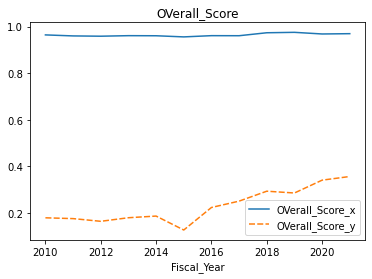

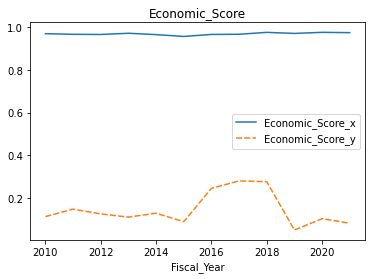

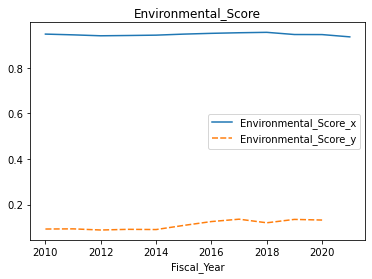

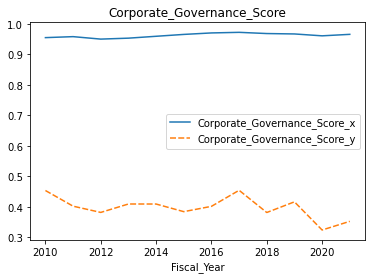

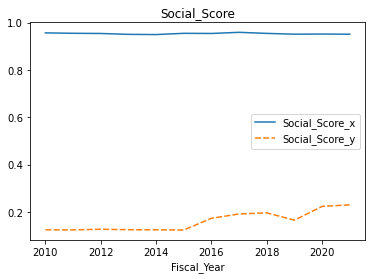

In [7]:
ESGcategory = ["OVerall_Score", "Economic_Score", "Environmental_Score", "Corporate_Governance_Score", "Social_Score"]

#dictionary containing 5 dataframes. Each dataframe contains the top 20 companies in each ESG Category.
dictOfTopProfile = {}

#5 dataframe but the bottom 20 companies
dictOfBottomProfile = {}

for category in ESGcategory: 
    #Get the top 20 companies in category for every year starting in 2010

    temp = spEnv.sort_values(by =["Fiscal_Year", category] , ascending=[True, False]) 
    
    #For every year, get the score descending the top 20 stocks
    topProfile_df  = pd.DataFrame()
    bottomProfile_df  = pd.DataFrame()
    for year in temp['Fiscal_Year'].unique():
        topProfile_df = pd.concat([topProfile_df, temp[temp["Fiscal_Year"] == year].head(20)])
        bottomProfile_df = pd.concat([bottomProfile_df, temp[temp["Fiscal_Year"] == year].tail(20)])    
    
    dictOfTopProfile[category] = topProfile_df
    dictOfBottomProfile[category] = bottomProfile_df

    
topYearlyCategoryMean = {}
bottomYearlyCategoryMean  = {}
data = {}
dfa = {}
for category in ESGcategory:
    topYearlyCategoryMean[category] = dictOfTopProfile[category].groupby(['Fiscal_Year'], as_index=False).agg(
                      {category:['mean']})
    bottomYearlyCategoryMean[category] = dictOfBottomProfile[category].groupby(['Fiscal_Year'], as_index=False).agg(
                      {category:['mean']})
    
    
    data[category] = pd.merge(topYearlyCategoryMean[category], bottomYearlyCategoryMean[category] , on="Fiscal_Year")
    
    dfa[category] = pd.DataFrame.from_dict(data[category])    
    dfa[category].set_index('Fiscal_Year', inplace=True)
    print(dfa[category])
    
    plt.figure()
    chart = sns.lineplot(data=dfa[category])
    chart.set(title=category)
    
#Code for calculating return for all portfiolios
for category in ESGcategory:
    dictOfTopProfile[category] = pd.merge(dictOfTopProfile[category], spRet, how = 'inner') 
    dictOfBottomProfile[category] = pd.merge(dictOfBottomProfile[category], spRet, how = 'inner')

    
#Merge the env score dataframe and financial returns dataframe
#For each year, in OVerall_score, get the top 20 companies's monthly returns. It is 11 monthly return for 2010 no return for the first month 

#with pd.option_context("display.max_rows", 10000):
#    display(dictOfTopProfile["OVerall_Score"] )


## The top portfolio's monthly esg return:
By taking the average, we assume that the stocks are equally weighted in the index

In [8]:
dictOfTopMonthlyReturn = {}
dictOfBottomMonthlyReturn = {}

for category in ESGcategory:
    dictOfTopMonthlyReturn[category] = dictOfTopProfile[category].groupby(['Fiscal_Monthly'], as_index=False).agg(
                      {'profile_return':'mean'}) 
    dictOfBottomMonthlyReturn[category] = dictOfBottomProfile[category].groupby(['Fiscal_Monthly'], as_index=False).agg(
                      {'profile_return':'mean'})

#Getting the monthly return of top_OVerall_score profile
dictOfTopMonthlyReturn["OVerall_Score"]

Fiscal_Monthly  profile_return
0          01-2011        0.008245
1          01-2012        0.051775
2          01-2013        0.068107
3          01-2014       -0.026468
4          01-2015       -0.042050
..             ...             ...
138        12-2017        0.007492
139        12-2018       -0.099482
140        12-2019        0.040282
141        12-2020        0.010528
142        12-2021        0.059676

[143 rows x 2 columns]

#The limiting factor for the s&p stocks is the data 2022-07-31. Only have the most recent data for 125 companies. We care about 2022-06-31 

#The limiting factor for the s&p index is the data 2022-07-31. Meaning even the index isn't updated yet- most recent 2022-06-30

## risk free rate of return - average yield of us treasury bills

FRED's TBILL

In [9]:
tBillIndexRet = pd.read_excel(r'C:\Users\huang\Documents\esg\final_tbill_fixed.xls')

#Converting the TBILL's percent return to decimal
tBillIndexRet['TBILL_return'] = tBillIndexRet['TBILL_return'].apply(lambda x: x/100)

tBillIndexRet


Fiscal_Monthly  TBILL_return
0           01-1934        0.0072
1           02-1934        0.0062
2           03-1934        0.0024
3           04-1934        0.0015
4           05-1934        0.0016
...             ...           ...
1057        02-2022        0.0033
1058        03-2022        0.0044
1059        04-2022        0.0076
1060        05-2022        0.0098
1061        06-2022        0.0149

[1062 rows x 2 columns]

Calculating the excess returns of the s&p500 and the portfolio. Used to calculate alpha later

In [10]:
top_rets_df = {}
bottom_rets_df = {}

for category in ESGcategory:
    top_rets_df[category] = pd.merge(pd.merge(dictOfTopMonthlyReturn[category], spIndexRet, on='Fiscal_Monthly'), tBillIndexRet, on='Fiscal_Monthly')
    bottom_rets_df[category] = pd.merge(pd.merge(dictOfBottomMonthlyReturn[category], spIndexRet, on='Fiscal_Monthly'), tBillIndexRet, on='Fiscal_Monthly')
    

for category in ESGcategory:
    top_rets_df[category]['sp_ex_return']  = top_rets_df[category].apply(lambda f: f['S&P_return'] - f['TBILL_return'], axis=1)
    top_rets_df[category]['prof_ex_return']  = top_rets_df[category].apply(lambda f: f['profile_return'] - f['TBILL_return'], axis=1) 
    bottom_rets_df[category]['sp_ex_return']  = bottom_rets_df[category].apply(lambda f: f['S&P_return'] - f['TBILL_return'], axis=1)
    bottom_rets_df[category]['prof_ex_return']  = bottom_rets_df[category].apply(lambda f: f['profile_return'] - f['TBILL_return'], axis=1)  
    
top_rets_df["OVerall_Score"]


Fiscal_Monthly  profile_return  Global Index Key - Index Monthly  \
0          01-2011        0.008245                                 3   
1          01-2012        0.051775                                 3   
2          01-2013        0.068107                                 3   
3          01-2014       -0.026468                                 3   
4          01-2015       -0.042050                                 3   
..             ...             ...                               ...   
138        12-2017        0.007492                                 3   
139        12-2018       -0.099482                                 3   
140        12-2019        0.040282                                 3   
141        12-2020        0.010528                                 3   
142        12-2021        0.059676                                 3   

     Price_Close_Monthly        Index Name Index Code Type Ticker  S&P_return  \
0                1286.12  S&P 500 Comp-Ltd           LGCAP  I0003    0.022646   
1                1312.41  S&P 500 Comp-Ltd           LGCAP  I0003    0.043583   
2                1498.11  S&P 500 Comp-Ltd           LGCAP  I0003    0.050428   
3                1782.59  S&P 500 Comp-Ltd           LGCAP  I0003   -0.035583   
4                1994.99  S&P 500 Comp-Ltd           LGCAP  I0003   -0.031041   
..                   ...               ...             ...    ...         ...   
138              2673.61  S&P 500 Comp-Ltd           LGCAP  I0003    0.009832   
139              2506.85  S&P 500 Comp-Ltd           LGCAP  I0003   -0.091777   
140              3230.78  S&P 500 Comp-Ltd           LGCAP  I0003    0.028590   
141              3756.07  S&P 500 Comp-Ltd           LGCAP  I0003    0.037121   
142              4766.18  S&P 500 Comp-Ltd           LGCAP  I0003    0.043613   

     TBILL_return  sp_ex_return  prof_ex_return  
0          0.0015      0.021146        0.006745  
1          0.0003      0.043283        0.051475  
2          0.0007      0.049728        0.067407  
3          0.0004     -0.035983       -0.026868  
4          0.0003     -0.031341       -0.042350  
..            ...           ...             ...  
138        0.0132     -0.003368       -0.005708  
139        0.0237     -0.115477       -0.123182  
140        0.0154      0.013190        0.024882  
141        0.0009      0.036221        0.009628  
142        0.0006      0.043013        0.059076  

[143 rows x 11 columns]

## Regression Test

In [11]:
#dictionary to store the models of the linear regressions. 2 dimensonal array- sector and then category
dictOfTopModels = {}
tempY_dict  = {}
dictOfTopModels["Overall"] = tempY_dict

dictOfBottomModels = {}
tempZ_dict  = {}
dictOfBottomModels["Overall"] = tempZ_dict

In [12]:
import statsmodels.api as sm

for category in ESGcategory:
    X = top_rets_df[category]["prof_ex_return"] ## X usually means our input variables (or independent variables)
    y = top_rets_df[category]["sp_ex_return"] ## Y usually means our output/dependent variable
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
    #predictions = model.predict(X)
    dictOfTopModels["Overall"][category] = model 
    
    # Print out the statistics
    print(category)
    print(model.summary())
    
    
    
for category in ESGcategory:
    X = bottom_rets_df[category]["prof_ex_return"] ## X usually means our input variables (or independent variables)
    y = bottom_rets_df[category]["sp_ex_return"] ## Y usually means our output/dependent variable
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
    #predictions = model.predict(X)
    dictOfBottomModels["Overall"][category] = model 
    
    # Print out the statistics
    print(category)
    print(model.summary())


C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


OVerall_Score
                            OLS Regression Results                            
Dep. Variable:           sp_ex_return   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     1106.
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           1.32e-68
Time:                        16:49:33   Log-Likelihood:                 409.87
No. Observations:                 143   AIC:                            -815.7
Df Residuals:                     141   BIC:                            -809.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0002     

C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

## Conclusion

Alpha is the Intercept. Beta is the Slope. 

The alpha is .0002. The beta is .8919.
A positive alpha of .0002 means the fund or stock has outperformed its benchmark index by .0002 percent. 
A beta of less than 1, .8919, means that the security will be less volatile than the market.

The top overall esg stocks does not appear to be better than the bench mark. It appears to be less volatile.

https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/

The beta's p-value is signficiant for each of the regression, but the alpha is not.
Good
OVerall_score .8919
Economic Score .8796
Environmental Score .5454
Corporate_Governance_Score .8085
Social_Score .9148

Bad
OVerall_score .5681
Economic Score .6698
Environmental Score .8419
Corporate_Governance_Score .5941
Social_Score .6014

ESG - A good environmental_score is most important for lowering risk. 
ESG - A bad overall score is most important for lowering risk. WTF? Crime does pay.


Unethical stock portfolios face lower risk unless they are unethical environmentally which increases  the risk.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

Graph shoes top_Overall_score portfolio vs s&p500. If the top_overall_score has a more narrow range in returns both positively and negatively then it is less volatile and lower beta.

In [14]:
top_rets_df["OVerall_Score"]["Fiscal_Monthly"]

0      01-2011
1      01-2012
2      01-2013
3      01-2014
4      01-2015
        ...   
138    12-2017
139    12-2018
140    12-2019
141    12-2020
142    12-2021
Name: Fiscal_Monthly, Length: 143, dtype: object

In [15]:
for category in ESGcategory:
    top_rets_df[category]["Fiscal_Monthly"] = pd.to_datetime(top_rets_df[category]['Fiscal_Monthly'])
    bottom_rets_df[category]["Fiscal_Monthly"] = pd.to_datetime(bottom_rets_df[category]['Fiscal_Monthly'])


In [16]:
top_rets_df["OVerall_Score"]["Fiscal_Monthly"].dt.year

0      2011
1      2012
2      2013
3      2014
4      2015
       ... 
138    2017
139    2018
140    2019
141    2020
142    2021
Name: Fiscal_Monthly, Length: 143, dtype: int64

In [17]:
bottom_rets_df["OVerall_Score"]

Fiscal_Monthly  profile_return  Global Index Key - Index Monthly  \
0       2011-01-01        0.011021                                 3   
1       2012-01-01        0.038970                                 3   
2       2013-01-01        0.071835                                 3   
3       2014-01-01        0.033022                                 3   
4       2015-01-01        0.242823                                 3   
..             ...             ...                               ...   
138     2017-12-01       -0.016632                                 3   
139     2018-12-01       -0.098864                                 3   
140     2019-12-01        0.004751                                 3   
141     2020-12-01        0.026123                                 3   
142     2021-12-01        0.077336                                 3   

     Price_Close_Monthly        Index Name Index Code Type Ticker  S&P_return  \
0                1286.12  S&P 500 Comp-Ltd           LGCAP  I0003    0.022646   
1                1312.41  S&P 500 Comp-Ltd           LGCAP  I0003    0.043583   
2                1498.11  S&P 500 Comp-Ltd           LGCAP  I0003    0.050428   
3                1782.59  S&P 500 Comp-Ltd           LGCAP  I0003   -0.035583   
4                1994.99  S&P 500 Comp-Ltd           LGCAP  I0003   -0.031041   
..                   ...               ...             ...    ...         ...   
138              2673.61  S&P 500 Comp-Ltd           LGCAP  I0003    0.009832   
139              2506.85  S&P 500 Comp-Ltd           LGCAP  I0003   -0.091777   
140              3230.78  S&P 500 Comp-Ltd           LGCAP  I0003    0.028590   
141              3756.07  S&P 500 Comp-Ltd           LGCAP  I0003    0.037121   
142              4766.18  S&P 500 Comp-Ltd           LGCAP  I0003    0.043613   

     TBILL_return  sp_ex_return  prof_ex_return  
0          0.0015      0.021146        0.009521  
1          0.0003      0.043283        0.038670  
2          0.0007      0.049728        0.071135  
3          0.0004     -0.035983        0.032622  
4          0.0003     -0.031341        0.242523  
..            ...           ...             ...  
138        0.0132     -0.003368       -0.029832  
139        0.0237     -0.115477       -0.122564  
140        0.0154      0.013190       -0.010649  
141        0.0009      0.036221        0.025223  
142        0.0006      0.043013        0.076736  

[143 rows x 11 columns]

In [18]:
bottom_rets_df["Economic_Score"]

Fiscal_Monthly  profile_return  Global Index Key - Index Monthly  \
0       2011-01-01        0.045785                                 3   
1       2012-01-01        0.068127                                 3   
2       2013-01-01        0.026208                                 3   
3       2014-01-01       -0.005402                                 3   
4       2015-01-01        0.005003                                 3   
..             ...             ...                               ...   
138     2017-12-01       -0.003205                                 3   
139     2018-12-01       -0.086453                                 3   
140     2019-12-01        0.031037                                 3   
141     2020-12-01        0.041734                                 3   
142     2021-12-01        0.055231                                 3   

     Price_Close_Monthly        Index Name Index Code Type Ticker  S&P_return  \
0                1286.12  S&P 500 Comp-Ltd           LGCAP  I0003    0.022646   
1                1312.41  S&P 500 Comp-Ltd           LGCAP  I0003    0.043583   
2                1498.11  S&P 500 Comp-Ltd           LGCAP  I0003    0.050428   
3                1782.59  S&P 500 Comp-Ltd           LGCAP  I0003   -0.035583   
4                1994.99  S&P 500 Comp-Ltd           LGCAP  I0003   -0.031041   
..                   ...               ...             ...    ...         ...   
138              2673.61  S&P 500 Comp-Ltd           LGCAP  I0003    0.009832   
139              2506.85  S&P 500 Comp-Ltd           LGCAP  I0003   -0.091777   
140              3230.78  S&P 500 Comp-Ltd           LGCAP  I0003    0.028590   
141              3756.07  S&P 500 Comp-Ltd           LGCAP  I0003    0.037121   
142              4766.18  S&P 500 Comp-Ltd           LGCAP  I0003    0.043613   

     TBILL_return  sp_ex_return  prof_ex_return  
0          0.0015      0.021146        0.044285  
1          0.0003      0.043283        0.067827  
2          0.0007      0.049728        0.025508  
3          0.0004     -0.035983       -0.005802  
4          0.0003     -0.031341        0.004703  
..            ...           ...             ...  
138        0.0132     -0.003368       -0.016405  
139        0.0237     -0.115477       -0.110153  
140        0.0154      0.013190        0.015637  
141        0.0009      0.036221        0.040834  
142        0.0006      0.043013        0.054631  

[143 rows x 11 columns]

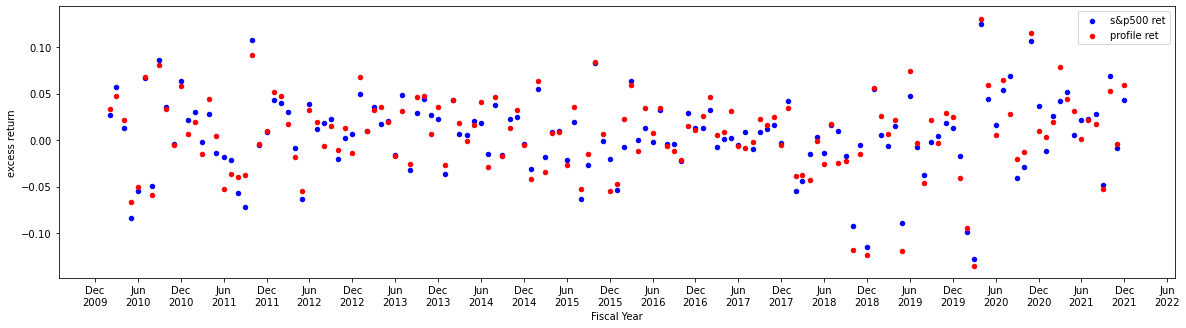

In [19]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates


ax = top_rets_df["OVerall_Score"].plot(kind="scatter", x="Fiscal_Monthly",y="sp_ex_return", color="b", label="s&p500 ret", figsize=(20,5))
top_rets_df["OVerall_Score"].plot(kind="scatter", x="Fiscal_Monthly",y="prof_ex_return", color="r", label="profile ret", ax=ax)

loc = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(loc)
fmt = mdates.DateFormatter('%b\n%Y')
ax.xaxis.set_major_formatter(fmt)

ax.set_yticks((-.1,-.05, 0, .05, .10))

ax.set_xlabel("Fiscal Year")
ax.set_ylabel("excess return")
#plt.figure(figsize=(20,1))


plt.show()

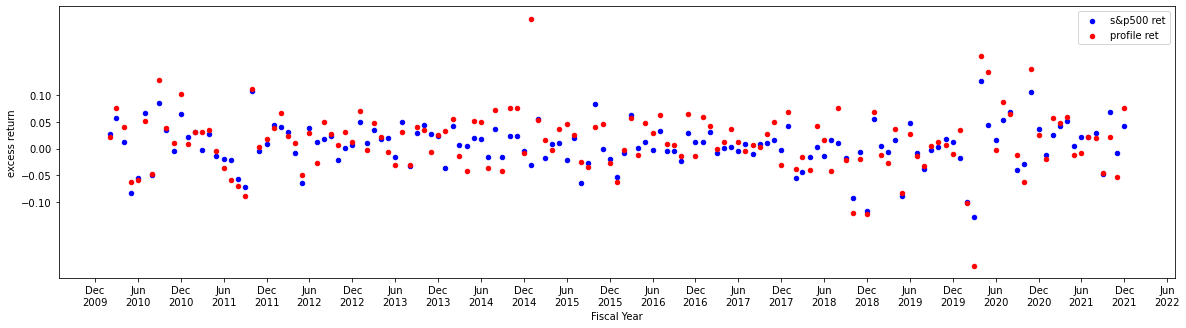

In [20]:
ax = bottom_rets_df["OVerall_Score"].plot(kind="scatter", x="Fiscal_Monthly",y="sp_ex_return", color="b", label="s&p500 ret", figsize=(20,5))
bottom_rets_df["OVerall_Score"].plot(kind="scatter", x="Fiscal_Monthly",y="prof_ex_return", color="r", label="profile ret", ax=ax)

loc = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(loc)
fmt = mdates.DateFormatter('%b\n%Y')
ax.xaxis.set_major_formatter(fmt)

ax.set_yticks((-.1,-.05, 0, .05, .10))

ax.set_xlabel("Fiscal Year")
ax.set_ylabel("excess return")
#plt.figure(figsize=(20,1))
plt.show()

I am assuming that the bottom chart, since it has lower beta, is more constraned around the y=0. I think there is a way to check- something with residuals? Using R. Normal probability plot forces the regression line to be y=0

## Getting the industry and seeing relationship

In [21]:
spIndustry

Ticker                  Company Name ISO Currency Code  \
0       AAL   AMERICAN AIRLINES GROUP INC               USD   
12      PNW    PINNACLE WEST CAPITAL CORP               USD   
24      ABT           ABBOTT LABORATORIES               USD   
36      AMD        ADVANCED MICRO DEVICES               USD   
48      APD  AIR PRODUCTS & CHEMICALS INC               USD   
...     ...                           ...               ...   
6947   FBHS   FORTUNE BRANDS HOME & SECUR               USD   
6959    XYL                     XYLEM INC               USD   
6971   CBRE                CBRE GROUP INC               USD   
6995    LYB  LYONDELLBASELL INDUSTRIES NV               USD   
7007   ALLE                  ALLEGION PLC               USD   

     Active/Inactive Status Marker  GIC Groups  GIC Industries  GIC_Sectors  \
0                                A        2030          203020           20   
12                               A        5510          551010           55   
24                               A        3510          351010           35   
36                               A        4530          453010           45   
48                               A        1510          151010           15   
...                            ...         ...             ...          ...   
6947                             A        2010          201020           20   
6959                             A        2010          201060           20   
6971                             A        6010          601020           60   
6995                             A        1510          151010           15   
7007                             A        2010          201020           20   

      GIC Sub-Industries  
0               20302010  
12              55101010  
24              35101010  
36              45301020  
48              15101040  
...                  ...  
6947            20102010  
6959            20106020  
6971            60102040  
6995            15101010  
7007            20102010  

[503 rows x 8 columns]

In [22]:
#Merge the env score dataframe and financial returns dataframe
#For each year, in OVerall_score, get the top 20 companies's monthly returns. It is 11 monthly return for 2010 no return for the first month 

with pd.option_context("display.max_rows", 10000):
   display(dictOfTopProfile["OVerall_Score"] )

Organization ID  Fiscal_Year  OVerall_Score  Economic_Score  \
0               18254         2010       0.971665        0.967370   
1               18254         2010       0.971665        0.967370   
2               18254         2010       0.971665        0.967370   
3               18254         2010       0.971665        0.967370   
4               18254         2010       0.971665        0.967370   
5               18254         2010       0.971665        0.967370   
6               18254         2010       0.971665        0.967370   
7               18254         2010       0.971665        0.967370   
8               18254         2010       0.971665        0.967370   
9               18254         2010       0.971665        0.967370   
10              18254         2010       0.971665        0.967370   
11          119895127         2010       0.971625        0.976323   
12          119895127         2010       0.971625        0.976323   
13          119895127         2010       0.971625        0.976323   
14          119895127         2010       0.971625        0.976323   
15          119895127         2010       0.971625        0.976323   
16          119895127         2010       0.971625        0.976323   
17          119895127         2010       0.971625        0.976323   
18          119895127         2010       0.971625        0.976323   
19          119895127         2010       0.971625        0.976323   
20          119895127         2010       0.971625        0.976323   
21          119895127         2010       0.971625        0.976323   
22              18206         2010       0.970515        0.960243   
23              18206         2010       0.970515        0.960243   
24              18206         2010       0.970515        0.960243   
25              18206         2010       0.970515        0.960243   
26              18206         2010       0.970515        0.960243   
27              18206         2010       0.970515        0.960243   
28              18206         2010       0.970515        0.960243   
29              18206         2010       0.970515        0.960243   
30              18206         2010       0.970515        0.960243   
31              18206         2010       0.970515        0.960243   
32              18206         2010       0.970515        0.960243   
33              18236         2010       0.970446        0.971149   
34              18236         2010       0.970446        0.971149   
35              18236         2010       0.970446        0.971149   
36              18236         2010       0.970446        0.971149   
37              18236         2010       0.970446        0.971149   
38              18236         2010       0.970446        0.971149   
39              18236         2010       0.970446        0.971149   
40              18236         2010       0.970446        0.971149   
41              18236         2010       0.970446        0.971149   
42              18236         2010       0.970446        0.971149   
43              18236         2010       0.970446        0.971149   
44              18228         2010       0.968537        0.970075   
45              18228         2010       0.968537        0.970075   
46              18228         2010       0.968537        0.970075   
47              18228         2010       0.968537        0.970075   
48              18228         2010       0.968537        0.970075   
49              18228         2010       0.968537        0.970075   
50              18228         2010       0.968537        0.970075   
51              18228         2010       0.968537        0.970075   
52              18228         2010       0.968537        0.970075   
53              18228         2010       0.968537        0.970075   
54              18228         2010       0.968537        0.970075   
55              31319         2010       0.967028        0.969253   
56              31319         2010       0.967028        0.969253   
57  

In [23]:
spEnv

Organization ID  Fiscal_Year  OVerall_Score  Economic_Score  \
0               10625         2012       0.903136        0.691096   
1               10625         2018       0.925016        0.961376   
2               10625         2016       0.947315        0.955375   
3               10625         2019       0.821133        0.265033   
4               10625         2011       0.955718        0.898867   
...               ...          ...            ...             ...   
3749        119901881         2014       0.473015        0.184984   
3750        119901881         2013       0.476370        0.443578   
3751        119901881         2012       0.599010        0.701873   
3752        119901881         2011       0.532595        0.525273   
3753        119901881         2010       0.470021        0.326501   

      Environmental_Score  Corporate_Governance_Score  Social_Score Ticker  
0                0.868136                    0.788041      0.933856     DE  
1                0.948539                    0.504560      0.906080     DE  
2                0.928867                    0.845178      0.911892     DE  
3                0.930694                    0.613558      0.954296     DE  
4                0.911706                    0.934404      0.940291     DE  
...                   ...                         ...           ...    ...  
3749             0.735990                    0.286304      0.736497    APA  
3750             0.677600                    0.258232      0.570717    APA  
3751             0.789849                    0.174677      0.587185    APA  
3752             0.808546                    0.220318      0.527905    APA  
3753             0.667034                    0.486223      0.445279    APA  

[3754 rows x 8 columns]

In [24]:
gicSectors = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
ESGcategory = ["OVerall_Score", "Economic_Score", "Environmental_Score", "Corporate_Governance_Score", "Social_Score"]

dictIndustryCategoryTop = {}
dictIndustryCategoryBottom = {}

dictOfTopMonthlyReturn = {}
dictOfBottomMonthlyReturn = {}
    
top_rets_dict = {}
bottom_rets_dict = {}
    
#merging the esg data with Industry
spEnvIndustry = pd.merge(spEnv, spIndustry , on="Ticker")

#Calculate return of top and bottom of a esg score and gic sector
for sector in gicSectors:
    tempA_dict  = {}
    tempB_dict  = {}
    
    dictIndustryCategoryTop[sector] = tempA_dict
    dictIndustryCategoryBottom[sector] = tempB_dict
    
    tempC_dict  = {}
    tempD_dict  = {}
    
    dictOfTopMonthlyReturn[sector] = tempC_dict
    dictOfBottomMonthlyReturn[sector] = tempD_dict

    tempE_dict  = {}
    tempF_dict  = {}

    top_rets_dict[sector] = tempE_dict
    bottom_rets_dict[sector] = tempF_dict
    
    tempG_dict  = {}
    tempH_dict  = {}
    
    dictOfTopModels[sector] = tempG_dict
    dictOfBottomModels[sector] = tempH_dict
    
    for category in ESGcategory: 
        
        #sort companies in industry by esg category
        temp = spEnvIndustry[spEnvIndustry["GIC_Sectors"] == sector].sort_values(by =["Fiscal_Year", category] , ascending=[True, False]) 
        
        #For every year, get the score descending, the top 6 stocks and bottom 6
        topProfile_df  = pd.DataFrame()
        bottomProfile_df  = pd.DataFrame()
        for year in temp['Fiscal_Year'].unique():
            topProfile_df = pd.concat([topProfile_df, temp[temp["Fiscal_Year"] == year].head(6)])
            bottomProfile_df = pd.concat([bottomProfile_df, temp[temp["Fiscal_Year"] == year].tail(6)])
       
        dictIndustryCategoryTop[sector][category] = topProfile_df
        dictIndustryCategoryBottom[sector][category] = bottomProfile_df

    #Code for calculating return for all portfiolios
    for category in ESGcategory:
        dictIndustryCategoryTop[sector][category] = pd.merge(dictIndustryCategoryTop[sector][category], spRet, how = 'inner') 
        dictIndustryCategoryBottom[sector][category] = pd.merge(dictIndustryCategoryBottom[sector][category], spRet, how = 'inner')

    

    for category in ESGcategory:
        dictOfTopMonthlyReturn[sector][category] = dictIndustryCategoryTop[sector][category].groupby(['Fiscal_Monthly'], as_index=False).agg(
                          {'profile_return':'mean'}) 
        dictOfBottomMonthlyReturn[sector][category] = dictIndustryCategoryBottom[sector][category].groupby(['Fiscal_Monthly'], as_index=False).agg(
                          {'profile_return':'mean'})
        

    for category in ESGcategory:
        top_rets_dict[sector][category] = pd.merge(pd.merge(dictOfTopMonthlyReturn[sector][category], spIndexRet, on='Fiscal_Monthly'), tBillIndexRet, on='Fiscal_Monthly')
        bottom_rets_dict[sector][category] = pd.merge(pd.merge(dictOfBottomMonthlyReturn[sector][category], spIndexRet, on='Fiscal_Monthly'), tBillIndexRet, on='Fiscal_Monthly')


    for category in ESGcategory:
        top_rets_dict[sector][category]['sp_ex_return']  = top_rets_dict[sector][category].apply(lambda f: f['S&P_return'] - f['TBILL_return'], axis=1)
        top_rets_dict[sector][category]['prof_ex_return']  = top_rets_dict[sector][category].apply(lambda f: f['profile_return'] - f['TBILL_return'], axis=1) 
        bottom_rets_dict[sector][category]['sp_ex_return']  = bottom_rets_dict[sector][category].apply(lambda f: f['S&P_return'] - f['TBILL_return'], axis=1)
        bottom_rets_dict[sector][category]['prof_ex_return']  = bottom_rets_dict[sector][category].apply(lambda f: f['profile_return'] - f['TBILL_return'], axis=1)  

        
    for category in ESGcategory:
        X = top_rets_dict[sector][category]["prof_ex_return"] ## X usually means our input variables (or independent variables)
        y = top_rets_dict[sector][category]["sp_ex_return"] ## Y usually means our output/dependent variable
        X = sm.add_constant(X)

        model = sm.OLS(y, X).fit() 
        dictOfTopModels[sector][category] = model
        
        # Print out the statistics
        print(sector)
        print(category)
        print(model.summary())
    
    
    
    for category in ESGcategory:
        X = bottom_rets_dict[sector][category]["prof_ex_return"] ## X usually means our input variables (or independent variables)
        y = bottom_rets_dict[sector][category]["sp_ex_return"] ## Y usually means our output/dependent variable
        X = sm.add_constant(X)

        model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
        #predictions = model.predict(X)
        dictOfBottomModels[sector][category] = model
        
        # Print out the statistics
        print(sector)
        print(category)
        print(model.summary())

#Getting the monthly return of top_OVerall_score profile
dictOfTopMonthlyReturn[10]["OVerall_Score"]
#with pd.option_context("display.max_rows", 10000):
#    display(dictIndustryCategoryTop[10]["Environmental_Score"])

C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

10
OVerall_Score
                            OLS Regression Results                            
Dep. Variable:           sp_ex_return   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           1.18e-29
Time:                        16:49:35   Log-Likelihood:                 319.10
No. Observations:                 143   AIC:                            -634.2
Df Residuals:                     141   BIC:                            -628.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0061  

C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

15
OVerall_Score
                            OLS Regression Results                            
Dep. Variable:           sp_ex_return   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     269.5
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           1.58e-34
Time:                        16:49:36   Log-Likelihood:                 330.43
No. Observations:                 143   AIC:                            -656.9
Df Residuals:                     141   BIC:                            -650.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0038  

C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

20
OVerall_Score
                            OLS Regression Results                            
Dep. Variable:           sp_ex_return   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     450.6
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           9.45e-46
Time:                        16:49:36   Log-Likelihood:                 356.57
No. Observations:                 143   AIC:                            -709.1
Df Residuals:                     141   BIC:                            -703.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0006  

C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

25
OVerall_Score
                            OLS Regression Results                            
Dep. Variable:           sp_ex_return   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     280.1
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           2.60e-35
Time:                        16:49:37   Log-Likelihood:                 332.26
No. Observations:                 143   AIC:                            -660.5
Df Residuals:                     141   BIC:                            -654.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0013  

C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

30
OVerall_Score
                            OLS Regression Results                            
Dep. Variable:           sp_ex_return   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     70.16
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           4.95e-14
Time:                        16:49:37   Log-Likelihood:                 282.91
No. Observations:                 143   AIC:                            -561.8
Df Residuals:                     141   BIC:                            -555.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0054  

C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

35
OVerall_Score
                            OLS Regression Results                            
Dep. Variable:           sp_ex_return   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     148.0
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           9.98e-24
Time:                        16:49:38   Log-Likelihood:                 305.34
No. Observations:                 143   AIC:                            -606.7
Df Residuals:                     141   BIC:                            -600.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0003  

C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

40
OVerall_Score
                            OLS Regression Results                            
Dep. Variable:           sp_ex_return   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     26.69
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           7.99e-07
Time:                        16:49:39   Log-Likelihood:                 266.43
No. Observations:                 143   AIC:                            -528.9
Df Residuals:                     141   BIC:                            -522.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0043  

C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

45
OVerall_Score
                            OLS Regression Results                            
Dep. Variable:           sp_ex_return   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     303.9
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           5.31e-37
Time:                        16:49:39   Log-Likelihood:                 336.19
No. Observations:                 143   AIC:                            -668.4
Df Residuals:                     141   BIC:                            -662.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0004  

C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

50
OVerall_Score
                            OLS Regression Results                            
Dep. Variable:           sp_ex_return   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     254.8
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           2.08e-33
Time:                        16:49:39   Log-Likelihood:                 327.83
No. Observations:                 143   AIC:                            -651.7
Df Residuals:                     141   BIC:                            -645.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0016  

C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

55
OVerall_Score
                            OLS Regression Results                            
Dep. Variable:           sp_ex_return   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     20.00
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           1.58e-05
Time:                        16:49:40   Log-Likelihood:                 263.52
No. Observations:                 143   AIC:                            -523.0
Df Residuals:                     141   BIC:                            -517.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0048  

C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\huang\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

60
OVerall_Score
                            OLS Regression Results                            
Dep. Variable:           sp_ex_return   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     152.0
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           3.78e-24
Time:                        16:49:40   Log-Likelihood:                 306.31
No. Observations:                 143   AIC:                            -608.6
Df Residuals:                     141   BIC:                            -602.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0012  

Fiscal_Monthly  profile_return
0          01-2011        0.108622
1          01-2012        0.071841
2          01-2013        0.144757
3          01-2014       -0.048033
4          01-2015       -0.012001
..             ...             ...
138        12-2017        0.084210
139        12-2018       -0.171707
140        12-2019        0.141902
141        12-2020        0.066553
142        12-2021        0.033256

[143 rows x 2 columns]

In [34]:
with pd.option_context("display.max_rows", 1000):
    display(dictIndustryCategoryBottom[10]["OVerall_Score"])

Organization ID  Fiscal_Year  OVerall_Score  Economic_Score  \
0              22689         2010       0.652585        0.665563   
1              22689         2010       0.652585        0.665563   
2              22689         2010       0.652585        0.665563   
3              22689         2010       0.652585        0.665563   
4              22689         2010       0.652585        0.665563   
5              22689         2010       0.652585        0.665563   
6              22689         2010       0.652585        0.665563   
7              22689         2010       0.652585        0.665563   
8              22689         2010       0.652585        0.665563   
9              22689         2010       0.652585        0.665563   
10             22689         2010       0.652585        0.665563   
11             28696         2010       0.634603        0.370338   
12             28696         2010       0.634603        0.370338   
13             28696         2010       0.634603        0.370338   
14             28696         2010       0.634603        0.370338   
15             28696         2010       0.634603        0.370338   
16             28696         2010       0.634603        0.370338   
17             28696         2010       0.634603        0.370338   
18             28696         2010       0.634603        0.370338   
19             28696         2010       0.634603        0.370338   
20             28696         2010       0.634603        0.370338   
21             28696         2010       0.634603        0.370338   
22             23222         2010       0.585905        0.518436   
23             23222         2010       0.585905        0.518436   
24             23222         2010       0.585905        0.518436   
25             23222         2010       0.585905        0.518436   
26             23222         2010       0.585905        0.518436   
27             23222         2010       0.585905        0.518436   
28             23222         2010       0.585905        0.518436   
29             23222         2010       0.585905        0.518436   
30             23222         2010       0.585905        0.518436   
31             23222         2010       0.585905        0.518436   
32             23222         2010       0.585905        0.518436   
33             33210         2010       0.526639        0.385721   
34             33210         2010       0.526639        0.385721   
35             33210         2010       0.526639        0.385721   
36             33210         2010       0.526639        0.385721   
37             33210         2010       0.526639        0.385721   
38             33210         2010       0.526639        0.385721   
39             33210         2010       0.526639        0.385721   
40             33210         2010       0.526639        0.385721   
41             33210         2010       0.526639        0.385721   
42             33210         2010       0.526639        0.385721   
43             33210         2010       0.526639        0.385721   
44         119901881         2010       0.470021        0.326501   
45         119901881         2010       0.470021        0.326501   
46         119901881         2010       0.470021        0.326501   
47         119901881         2010       0.470021        0.326501   
48         119901881         2010       0.470021        0.326501   
49         119901881         2010       0.470021        0.326501   
50         119901881         2010       0.470021        0.326501   
51         119901881         2010       0.470021        0.326501   
52         119901881         2010       0.470021        0.326501   
53         119901881         2010       0.470021        0.326501   
54         119901881         2010       0.470021        0.326501   
55            117695         2010       0.371517        0.675165   
56            117695         2010       0.371517        0.675165   
57            117695         2010       0.371517        0.675

In [33]:
with pd.option_context("display.max_rows", 1000):
    display(dictIndustryCategoryBottom[10]["Economic_Score"])

Organization ID  Fiscal_Year  OVerall_Score  Economic_Score  \
0              22689         2010       0.652585        0.665563   
1              22689         2010       0.652585        0.665563   
2              22689         2010       0.652585        0.665563   
3              22689         2010       0.652585        0.665563   
4              22689         2010       0.652585        0.665563   
5              22689         2010       0.652585        0.665563   
6              22689         2010       0.652585        0.665563   
7              22689         2010       0.652585        0.665563   
8              22689         2010       0.652585        0.665563   
9              22689         2010       0.652585        0.665563   
10             22689         2010       0.652585        0.665563   
11             23222         2010       0.585905        0.518436   
12             23222         2010       0.585905        0.518436   
13             23222         2010       0.585905        0.518436   
14             23222         2010       0.585905        0.518436   
15             23222         2010       0.585905        0.518436   
16             23222         2010       0.585905        0.518436   
17             23222         2010       0.585905        0.518436   
18             23222         2010       0.585905        0.518436   
19             23222         2010       0.585905        0.518436   
20             23222         2010       0.585905        0.518436   
21             23222         2010       0.585905        0.518436   
22            117453         2010       0.752788        0.486332   
23            117453         2010       0.752788        0.486332   
24            117453         2010       0.752788        0.486332   
25            117453         2010       0.752788        0.486332   
26            117453         2010       0.752788        0.486332   
27            117453         2010       0.752788        0.486332   
28            117453         2010       0.752788        0.486332   
29            117453         2010       0.752788        0.486332   
30            117453         2010       0.752788        0.486332   
31            117453         2010       0.752788        0.486332   
32            117453         2010       0.752788        0.486332   
33             33210         2010       0.526639        0.385721   
34             33210         2010       0.526639        0.385721   
35             33210         2010       0.526639        0.385721   
36             33210         2010       0.526639        0.385721   
37             33210         2010       0.526639        0.385721   
38             33210         2010       0.526639        0.385721   
39             33210         2010       0.526639        0.385721   
40             33210         2010       0.526639        0.385721   
41             33210         2010       0.526639        0.385721   
42             33210         2010       0.526639        0.385721   
43             33210         2010       0.526639        0.385721   
44             28696         2010       0.634603        0.370338   
45             28696         2010       0.634603        0.370338   
46             28696         2010       0.634603        0.370338   
47             28696         2010       0.634603        0.370338   
48             28696         2010       0.634603        0.370338   
49             28696         2010       0.634603        0.370338   
50             28696         2010       0.634603        0.370338   
51             28696         2010       0.634603        0.370338   
52             28696         2010       0.634603        0.370338   
53             28696         2010       0.634603        0.370338   
54             28696         2010       0.634603        0.370338   
55         119901881         2010       0.470021        0.326501   
56         119901881         2010       0.470021        0.326501   
57         119901881         2010       0.470021        0.326

In [39]:
with pd.option_context("display.max_rows", 1000):
    display(top_rets_dict[10]["OVerall_Score"])

Fiscal_Monthly  profile_return  Global Index Key - Index Monthly  \
0          01-2011        0.108622                                 3   
1          01-2012        0.071841                                 3   
2          01-2013        0.144757                                 3   
3          01-2014       -0.048033                                 3   
4          01-2015       -0.012001                                 3   
5          01-2016       -0.046756                                 3   
6          01-2017       -0.024330                                 3   
7          01-2018        0.068561                                 3   
8          01-2019        0.157867                                 3   
9          01-2020       -0.103552                                 3   
10         01-2021        0.017653                                 3   
11         02-2010       -0.009099                                 3   
12         02-2011        0.064248                                 3   
13         02-2012        0.034474                                 3   
14         02-2013       -0.002477                                 3   
15         02-2014        0.055405                                 3   
16         02-2015        0.049256                                 3   
17         02-2016       -0.038966                                 3   
18         02-2017       -0.028310                                 3   
19         02-2018       -0.154537                                 3   
20         02-2019       -0.007403                                 3   
21         02-2020       -0.151135                                 3   
22         02-2021        0.212620                                 3   
23         03-2010        0.057418                                 3   
24         03-2011        0.034455                                 3   
25         03-2012       -0.048191                                 3   
26         03-2013       -0.016999                                 3   
27         03-2014        0.041743                                 3   
28         03-2015       -0.020139                                 3   
29         03-2016        0.099431                                 3   
30         03-2017       -0.028246                                 3   
31         03-2018        0.043997                                 3   
32         03-2019        0.019868                                 3   
33         03-2020       -0.462074                                 3   
34         03-2021        0.022899                                 3   
35         04-2010        0.045778                                 3   
36         04-2011        0.017787                                 3   
37         04-2012       -0.011890                                 3   
38         04-2013        0.005666                                 3   
39         04-2014        0.043359                                 3   
40         04-2015        0.076674                                 3   
41         04-2016        0.101027                                 3   
42         04-2017       -0.042590                                 3   
43         04-2018        0.115792                                 3   
44         04-2019        0.009149                                 3   
45         04-2020        0.365107                                 3   
46         04-2021       -0.005117                                 3   
47         05-2010       -0.119231                                 3   
48         05-2011       -0.036027                                 3   
49         05-2012       -0.130915                                 3   
50         05-2013        0.011355                                 3   
51         05-2014        0.011120                                 3   
52         05-2015       -0.041065                                 3   
53         05-2016       -0.030204                                 3   
54         05-2017       -0.047646          

In [38]:
with pd.option_context("display.max_rows", 1000):
    display(bottom_rets_dict[10]["OVerall_Score"])

Fiscal_Monthly  profile_return  Global Index Key - Index Monthly  \
0          01-2011        0.080043                                 3   
1          01-2012        0.023352                                 3   
2          01-2013        0.078932                                 3   
3          01-2014       -0.008881                                 3   
4          01-2015       -0.029734                                 3   
5          01-2016       -0.069762                                 3   
6          01-2017       -0.028107                                 3   
7          01-2018        0.046024                                 3   
8          01-2019        0.159471                                 3   
9          01-2020       -0.088260                                 3   
10         01-2021        0.066910                                 3   
11         02-2010        0.043936                                 3   
12         02-2011        0.074376                                 3   
13         02-2012        0.074632                                 3   
14         02-2013       -0.023500                                 3   
15         02-2014        0.048951                                 3   
16         02-2015        0.036410                                 3   
17         02-2016       -0.119803                                 3   
18         02-2017       -0.036440                                 3   
19         02-2018       -0.112806                                 3   
20         02-2019        0.019469                                 3   
21         02-2020       -0.182653                                 3   
22         02-2021        0.338226                                 3   
23         03-2010        0.035451                                 3   
24         03-2011        0.027121                                 3   
25         03-2012       -0.014410                                 3   
26         03-2013        0.037315                                 3   
27         03-2014        0.005899                                 3   
28         03-2015        0.018512                                 3   
29         03-2016        0.201222                                 3   
30         03-2017        0.002726                                 3   
31         03-2018       -0.006217                                 3   
32         03-2019        0.044026                                 3   
33         03-2020       -0.558296                                 3   
34         03-2021        0.005747                                 3   
35         04-2010        0.081857                                 3   
36         04-2011        0.007937                                 3   
37         04-2012        0.019991                                 3   
38         04-2013       -0.006922                                 3   
39         04-2014       -0.044868                                 3   
40         04-2015        0.068264                                 3   
41         04-2016        0.185690                                 3   
42         04-2017       -0.040954                                 3   
43         04-2018        0.107821                                 3   
44         04-2019       -0.017957                                 3   
45         04-2020        0.795671                                 3   
46         04-2021        0.039146                                 3   
47         05-2010       -0.083655                                 3   
48         05-2011       -0.047383                                 3   
49         05-2012       -0.116176                                 3   
50         05-2013        0.024303                                 3   
51         05-2014        0.071723                                 3   
52         05-2015       -0.091219                                 3   
53         05-2016        0.063373                                 3   
54         05-2017       -0.059877          

In [37]:
with pd.option_context("display.max_rows", 1000):
    display(bottom_rets_dict[10]["Economic_Score"])

Fiscal_Monthly  profile_return  Global Index Key - Index Monthly  \
0          01-2011        0.085644                                 3   
1          01-2012        0.008437                                 3   
2          01-2013        0.069024                                 3   
3          01-2014       -0.015126                                 3   
4          01-2015       -0.036215                                 3   
5          01-2016       -0.078877                                 3   
6          01-2017       -0.046200                                 3   
7          01-2018        0.051826                                 3   
8          01-2019        0.165331                                 3   
9          01-2020       -0.088260                                 3   
10         01-2021        0.066910                                 3   
11         02-2010        0.025675                                 3   
12         02-2011        0.066969                                 3   
13         02-2012        0.068003                                 3   
14         02-2013       -0.015740                                 3   
15         02-2014        0.013997                                 3   
16         02-2015        0.050746                                 3   
17         02-2016       -0.112635                                 3   
18         02-2017       -0.046786                                 3   
19         02-2018       -0.165059                                 3   
20         02-2019        0.018774                                 3   
21         02-2020       -0.182653                                 3   
22         02-2021        0.338226                                 3   
23         03-2010        0.021641                                 3   
24         03-2011        0.028406                                 3   
25         03-2012       -0.009927                                 3   
26         03-2013        0.031723                                 3   
27         03-2014        0.023528                                 3   
28         03-2015        0.003146                                 3   
29         03-2016        0.191037                                 3   
30         03-2017        0.000861                                 3   
31         03-2018        0.027547                                 3   
32         03-2019        0.027700                                 3   
33         03-2020       -0.558296                                 3   
34         03-2021        0.005747                                 3   
35         04-2010        0.067967                                 3   
36         04-2011        0.006032                                 3   
37         04-2012        0.021177                                 3   
38         04-2013       -0.004976                                 3   
39         04-2014       -0.046946                                 3   
40         04-2015        0.088093                                 3   
41         04-2016        0.181741                                 3   
42         04-2017       -0.031019                                 3   
43         04-2018        0.078915                                 3   
44         04-2019       -0.016804                                 3   
45         04-2020        0.795671                                 3   
46         04-2021        0.039146                                 3   
47         05-2010       -0.099453                                 3   
48         05-2011       -0.043103                                 3   
49         05-2012       -0.115108                                 3   
50         05-2013        0.021657                                 3   
51         05-2014        0.047164                                 3   
52         05-2015       -0.092887                                 3   
53         05-2016        0.072683                                 3   
54         05-2017       -0.073107          

In [25]:
dictOfTopProfile["OVerall_Score"].dtypes

Organization ID                 int64
Fiscal_Year                     int64
OVerall_Score                 float64
Economic_Score                float64
Environmental_Score           float64
Corporate_Governance_Score    float64
Social_Score                  float64
Ticker                         object
Fiscal_Monthly                 object
Company_Name                   object
Price_Close_-_Monthly         float64
profile_return                float64
dtype: object

## Use the following codes to consolidate a dataframe of the coefficients and pvalue of the different linear regressions. We should have the coefficients/alpha and beta for the overall industry's esg scores and different industry's esg score

In [26]:
models_df = pd.DataFrame(columns = ['Quality', 'Sector', 'Category','Alpha', 'Pvals-A', 'Beta', 'Pvals-B'])

def results_summary_to_dataframe(quality, sector, category, results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    models_df.loc[len(models_df.index)] = [quality, sector, category, coeff[0], pvals[0], coeff[1], pvals[1]]
    

In [27]:
for category in ESGcategory:
        results_summary_to_dataframe("Top", "Overall", category, dictOfTopModels["Overall"][category])
        results_summary_to_dataframe("Bottom", "Overall", category, dictOfBottomModels["Overall"][category])
for sector in gicSectors:
    for category in ESGcategory:
        results_summary_to_dataframe("Top", sector, category, dictOfTopModels[sector][category])
        results_summary_to_dataframe("Bottom", sector, category, dictOfBottomModels[sector][category])
        

In [28]:
dict = {10 : 'Energy',
        15 : 'Materials',
        20 : 'Industrials',
        25 : 'Consumer Discretionary',
        30 : 'Consumer Staples',
        35 : 'Health Care',
        40 : 'Financials',
        45 : 'Information Technology',
        50 : 'Communication Services',
        55 : 'Utilities',
        60 : 'Real Estate'
       }
models_df = models_df.replace({"Sector": dict})



In [29]:
with pd.option_context("display.max_rows", 1000):
    display(models_df)


Quality                  Sector                    Category     Alpha  \
0       Top                 Overall               OVerall_Score  0.000155   
1    Bottom                 Overall               OVerall_Score -0.001785   
2       Top                 Overall              Economic_Score -0.000804   
3    Bottom                 Overall              Economic_Score -0.003086   
4       Top                 Overall         Environmental_Score  0.001263   
5    Bottom                 Overall         Environmental_Score -0.004384   
6       Top                 Overall  Corporate_Governance_Score  0.001227   
7    Bottom                 Overall  Corporate_Governance_Score -0.001742   
8       Top                 Overall                Social_Score  0.001474   
9    Bottom                 Overall                Social_Score -0.003074   
10      Top                  Energy               OVerall_Score  0.006079   
11   Bottom                  Energy               OVerall_Score  0.005004   
12      Top                  Energy              Economic_Score  0.005502   
13   Bottom                  Energy              Economic_Score  0.005363   
14      Top                  Energy         Environmental_Score  0.006155   
15   Bottom                  Energy         Environmental_Score  0.004845   
16      Top                  Energy  Corporate_Governance_Score  0.005059   
17   Bottom                  Energy  Corporate_Governance_Score  0.005759   
18      Top                  Energy                Social_Score  0.006316   
19   Bottom                  Energy                Social_Score  0.004588   
20      Top               Materials               OVerall_Score  0.003849   
21   Bottom               Materials               OVerall_Score  0.000628   
22      Top               Materials              Economic_Score  0.002771   
23   Bottom               Materials              Economic_Score  0.001882   
24      Top               Materials         Environmental_Score  0.001600   
25   Bottom               Materials         Environmental_Score  0.002959   
26      Top               Materials  Corporate_Governance_Score  0.003589   
27   Bottom               Materials  Corporate_Governance_Score  0.000422   
28      Top               Materials                Social_Score  0.002259   
29   Bottom               Materials                Social_Score  0.001594   
30      Top             Industrials               OVerall_Score -0.000590   
31   Bottom             Industrials               OVerall_Score  0.000417   
32      Top             Industrials              Economic_Score  0.000169   
33   Bottom             Industrials              Economic_Score  0.003953   
34      Top             Industrials         Environmental_Score  0.004330   
35   Bottom             Industrials         Environmental_Score -0.000063   
36      Top             Industrials  Corporate_Governance_Score  0.002647   
37   Bottom             Industrials  Corporate_Governance_Score  0.002073   
38      Top             Industrials                Social_Score  0.002278   
39   Bottom             Industrials                Social_Score  0.000195   
40      Top  Consumer Discretionary               OVerall_Score  0.001344   
41   Bottom  Consumer Discretionary               OVerall_Score  0.000674   
42      Top  Consumer Discretionary              Economic_Score  0.001840   
43   Bottom  Consumer Discretionary              Economic_Score  0.000651   
44      Top  Consumer Discretionary         Environmental_Score  0.002550   
45   Bottom  Consumer Discretionary         Environmental_Score -0.000440   
46      Top  Consumer Discretionary  Corporate_Governance_Score  0.001246   
47   Bottom  Consumer Discretionary  Corporate_Governance_Score  0.000814   
48      Top  Consumer Discretionary                Social_Score  0.002702   
49   Bottom  Consumer Discretionary                Social_Score  0.000578   
50      Top        Consumer Staples               OVerall_Score  0.005420   


In [30]:
models_df[(models_df["Pvals-A"]<.05)]

Quality            Sector                    Category     Alpha   Pvals-A  \
5   Bottom           Overall         Environmental_Score -0.004384  0.005731   
10     Top            Energy               OVerall_Score  0.006079  0.006205   
12     Top            Energy              Economic_Score  0.005502  0.015151   
13  Bottom            Energy              Economic_Score  0.005363  0.038565   
14     Top            Energy         Environmental_Score  0.006155  0.009511   
16     Top            Energy  Corporate_Governance_Score  0.005059  0.036815   
17  Bottom            Energy  Corporate_Governance_Score  0.005759  0.018629   
18     Top            Energy                Social_Score  0.006316  0.008721   
34     Top       Industrials         Environmental_Score  0.004330  0.013963   
58     Top  Consumer Staples                Social_Score  0.006141  0.038904   

        Beta       Pvals-B  
5   0.841886  9.463620e-53  
10  0.336597  1.184217e-29  
12  0.334952  2.750077e-28  
13  0.217304  8.333321e-20  
14  0.302059  1.721010e-25  
16  0.261843  5.310242e-24  
17  0.280785  1.799389e-23  
18  0.288378  1.282959e-24  
34  0.638314  7.827966e-44  
58  0.571121  2.819636e-11

In [31]:
with pd.option_context("display.max_rows", 1000):
    display(models_df[(models_df["Pvals-B"]<.05)])

Quality                  Sector                    Category     Alpha  \
0       Top                 Overall               OVerall_Score  0.000155   
1    Bottom                 Overall               OVerall_Score -0.001785   
2       Top                 Overall              Economic_Score -0.000804   
3    Bottom                 Overall              Economic_Score -0.003086   
4       Top                 Overall         Environmental_Score  0.001263   
5    Bottom                 Overall         Environmental_Score -0.004384   
6       Top                 Overall  Corporate_Governance_Score  0.001227   
7    Bottom                 Overall  Corporate_Governance_Score -0.001742   
8       Top                 Overall                Social_Score  0.001474   
9    Bottom                 Overall                Social_Score -0.003074   
10      Top                  Energy               OVerall_Score  0.006079   
11   Bottom                  Energy               OVerall_Score  0.005004   
12      Top                  Energy              Economic_Score  0.005502   
13   Bottom                  Energy              Economic_Score  0.005363   
14      Top                  Energy         Environmental_Score  0.006155   
15   Bottom                  Energy         Environmental_Score  0.004845   
16      Top                  Energy  Corporate_Governance_Score  0.005059   
17   Bottom                  Energy  Corporate_Governance_Score  0.005759   
18      Top                  Energy                Social_Score  0.006316   
19   Bottom                  Energy                Social_Score  0.004588   
20      Top               Materials               OVerall_Score  0.003849   
21   Bottom               Materials               OVerall_Score  0.000628   
22      Top               Materials              Economic_Score  0.002771   
23   Bottom               Materials              Economic_Score  0.001882   
24      Top               Materials         Environmental_Score  0.001600   
25   Bottom               Materials         Environmental_Score  0.002959   
26      Top               Materials  Corporate_Governance_Score  0.003589   
27   Bottom               Materials  Corporate_Governance_Score  0.000422   
28      Top               Materials                Social_Score  0.002259   
29   Bottom               Materials                Social_Score  0.001594   
30      Top             Industrials               OVerall_Score -0.000590   
31   Bottom             Industrials               OVerall_Score  0.000417   
32      Top             Industrials              Economic_Score  0.000169   
33   Bottom             Industrials              Economic_Score  0.003953   
34      Top             Industrials         Environmental_Score  0.004330   
35   Bottom             Industrials         Environmental_Score -0.000063   
36      Top             Industrials  Corporate_Governance_Score  0.002647   
37   Bottom             Industrials  Corporate_Governance_Score  0.002073   
38      Top             Industrials                Social_Score  0.002278   
39   Bottom             Industrials                Social_Score  0.000195   
40      Top  Consumer Discretionary               OVerall_Score  0.001344   
41   Bottom  Consumer Discretionary               OVerall_Score  0.000674   
42      Top  Consumer Discretionary              Economic_Score  0.001840   
43   Bottom  Consumer Discretionary              Economic_Score  0.000651   
44      Top  Consumer Discretionary         Environmental_Score  0.002550   
45   Bottom  Consumer Discretionary         Environmental_Score -0.000440   
46      Top  Consumer Discretionary  Corporate_Governance_Score  0.001246   
47   Bottom  Consumer Discretionary  Corporate_Governance_Score  0.000814   
48      Top  Consumer Discretionary                Social_Score  0.002702   
49   Bottom  Consumer Discretionary                Social_Score  0.000578   
50      Top        Consumer Staples               OVerall_Score  0.005420   


For overall companies, the unethical companies have lower beta - risk-. Exception is the environmental score.
For energy companies,  the unethical companies have lower beta except for unthical companies in corporate governance.
For materials, the unethical companies have lower beta except for corporate governance.
For industrials, the unethical companies have lower beta except for corporate governance.
For consumer discretionary, the unethical companies have lower beta except for corporate governance.
   For consumer staples, the ethical companies have lower beta except for environemntal score.
For health care, the unethical companies have lower beta score with no exception
For Financial, the ethical companies have lower beta except for economic score and corporate governance score.
For IT, the unethical companies have lower beta
For communication service, the unethical companies have lower beta.
For utilities, the beta is mixed.
For real estate- there are errors with the calculation. IDK why. maybe no enough realestate companies data.

Financial and consumer staples people use on daily basis so they depends on reputation more? They are targeted at individuals instead of other businesses. There is a greater choice- energy have monopolies.

## Graph- Use the differences. So do net beta = top beta- bottom beta. If net beta is positive then top esg companies are better. We can also use the magnitude of the net beta to highlight the effect of esg companies.  

In [42]:
net_df = pd.DataFrame(columns = [ 'Sector', 'Category', 'Good Beta', 'Bad Beta', 'Net Beta'])

for category in ESGcategory:
    dictOfTopModels["Overall"][category].params[1]
    net_df.loc[len(net_df.index)] = ["Overall", category, dictOfTopModels["Overall"][category].params[1], dictOfBottomModels["Overall"][category].params[1], dictOfTopModels["Overall"][category].params[1]-dictOfBottomModels["Overall"][category].params[1]]
for sector in gicSectors:
    for category in ESGcategory:
        net_df.loc[len(net_df.index)] = [sector, category, dictOfTopModels[sector][category].params[1], dictOfBottomModels[sector][category].params[1], dictOfTopModels[sector][category].params[1]-dictOfBottomModels[sector][category].params[1]]
        
net_df


Sector                    Category  Good Beta  Bad Beta  Net Beta
0   Overall               OVerall_Score   0.891931  0.568119  0.323812
1   Overall              Economic_Score   0.879632  0.669789  0.209843
2   Overall         Environmental_Score   0.545351  0.841886 -0.296535
3   Overall  Corporate_Governance_Score   0.808495  0.594054  0.214441
4   Overall                Social_Score   0.914802  0.601449  0.313353
5        10               OVerall_Score   0.336597  0.214374  0.122223
6        10              Economic_Score   0.334952  0.217304  0.117648
7        10         Environmental_Score   0.302059  0.234245  0.067813
8        10  Corporate_Governance_Score   0.261843  0.280785 -0.018941
9        10                Social_Score   0.288378  0.254703  0.033675
10       15               OVerall_Score   0.554108  0.557393 -0.003285
11       15              Economic_Score   0.532017  0.498797  0.033220
12       15         Environmental_Score   0.607690  0.458826  0.148863
13       15  Corporate_Governance_Score   0.481988  0.635033 -0.153045
14       15                Social_Score   0.619691  0.463554  0.156137
15       20               OVerall_Score   0.592101  0.550255  0.041845
16       20              Economic_Score   0.580814  0.155370  0.425444
17       20         Environmental_Score   0.638314  0.607909  0.030405
18       20  Corporate_Governance_Score   0.544751  0.582955 -0.038205
19       20                Social_Score   0.619221  0.569669  0.049551
20       25               OVerall_Score   0.545249  0.419451  0.125798
21       25              Economic_Score   0.506359  0.446035  0.060324
22       25         Environmental_Score   0.529261  0.514519  0.014741
23       25  Corporate_Governance_Score   0.500260  0.536946 -0.036686
24       25                Social_Score   0.483234  0.428995  0.054239
25       30               OVerall_Score   0.575473  0.682185 -0.106713
26       30              Economic_Score   0.612850  0.670749 -0.057899
27       30         Environmental_Score   0.642188  0.599863  0.042325
28       30  Corporate_Governance_Score   0.612418  0.686071 -0.073654
29       30                Social_Score   0.571121  0.627022 -0.055901
30       35               OVerall_Score   0.659519  0.436511  0.223008
31       35              Economic_Score   0.596655  0.419838  0.176817
32       35         Environmental_Score   0.739330  0.454697  0.284633
33       35  Corporate_Governance_Score   0.706174  0.370023  0.336151
34       35                Social_Score   0.707280  0.481794  0.225486
35       40               OVerall_Score   0.128668  0.594424 -0.465756
36       40              Economic_Score   0.517830  0.508506  0.009324
37       40         Environmental_Score   0.132667  0.617694 -0.485027
38       40  Corporate_Governance_Score   0.635931  0.472369  0.163562
39       40                Social_Score   0.130316  0.536516 -0.406200
40       45               OVerall_Score   0.581164  0.316624  0.264540
41       45              Economic_Score   0.633928  0.312059  0.321868
42       45         Environmental_Score   0.555311  0.309473  0.245838
43       45  Corporate_Governance_Score   0.570678  0.287982  0.282696
44       45                Social_Score   0.530661  0.328666  0.201995
45       50               OVerall_Score   0.668637  0.609333  0.059304
46       50              Economic_Score   0.668637  0.622453  0.046184
47       50         Environmental_Score   0.658389  0.621277  0.037111
48       50  Corporate_Governance_Score   0.668637  0.643032  0.025605
49       50                Social_Score   0.670355  0.608197  0.062157
50       55               OVerall_Score   0.300904  0.401467 -0.100563
51       55              Economic_Score   0.369839  0.337661  0.032178
52       55         Environmental_Score   0.277404  0.478087 -0.200684
53       55  Corporate_Governance_Score   0.512827  0.326677  0.186149
54       55                Social_Score   0.274618  0.421092 -0.146474
55       60               OVe

## Multiple issues
1) real estate is giving weird result
2) For sectors, the esg score have no impact on return which is wrong. Look at the graphs below

## Graph the profiles' return, then create histogram, then correlation. look at this website

https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook#3.-What-was-the-daily-return-of-the-stock-on-average?

## Overall Score- top and bottom

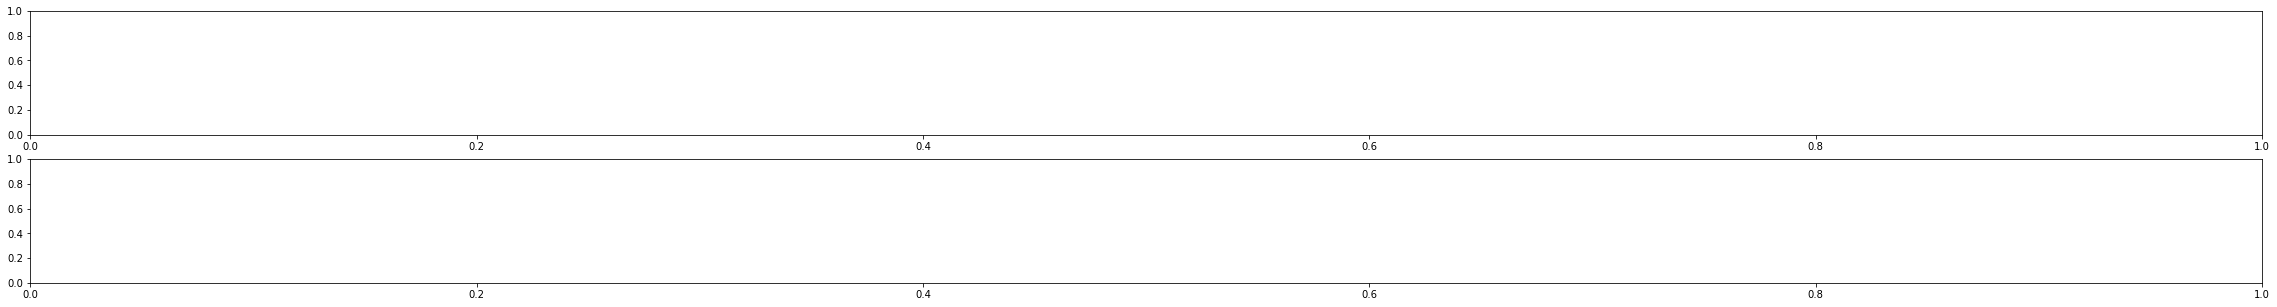

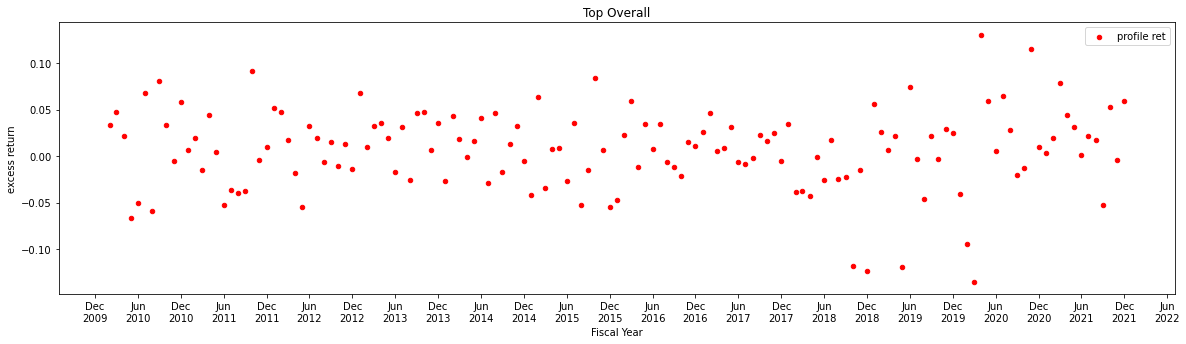

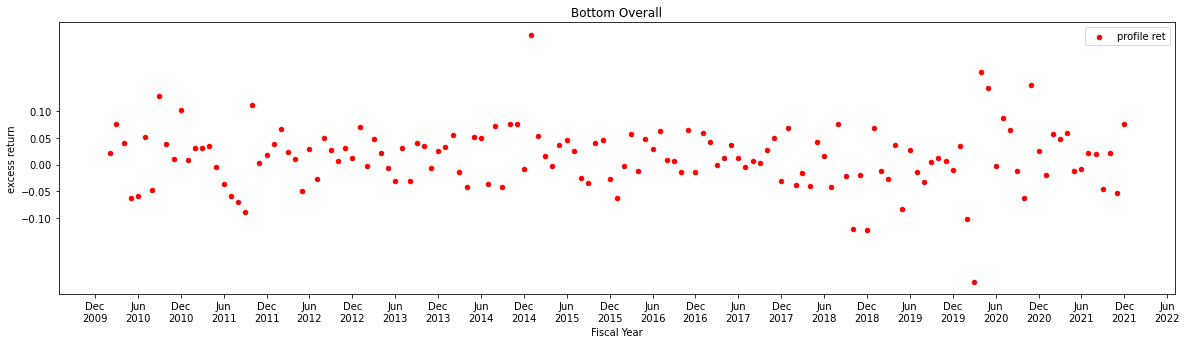

In [32]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates


fig, axes = plt.subplots(nrows=2, figsize=(40,5))

axes[0] = top_rets_df["OVerall_Score"].plot(kind="scatter", x="Fiscal_Monthly",y="prof_ex_return", color="r", label="profile ret", figsize=(20,5))

loc = mdates.MonthLocator(interval=6)
axes[0].xaxis.set_major_locator(loc)
fmt = mdates.DateFormatter('%b\n%Y')
axes[0].xaxis.set_major_formatter(fmt)

axes[0].set_yticks((-.1,-.05, 0, .05, .10))

axes[0].set_xlabel("Fiscal Year")
axes[0].set_ylabel("excess return")
axes[0].set_title("Top Overall")
#plt.figure(figsize=(20,1))


axes[1] = bottom_rets_df["OVerall_Score"].plot(kind="scatter", x="Fiscal_Monthly",y="prof_ex_return", color="r", label="profile ret", figsize=(20,5))

axes[1].xaxis.set_major_locator(loc)
axes[1].xaxis.set_major_formatter(fmt)
axes[1].set_yticks((-.1,-.05, 0, .05, .10))
axes[1].set_xlabel("Fiscal Year")
axes[1].set_ylabel("excess return")
axes[1].set_title("Bottom Overall")
plt.show()

## Economic Score- top and bottom

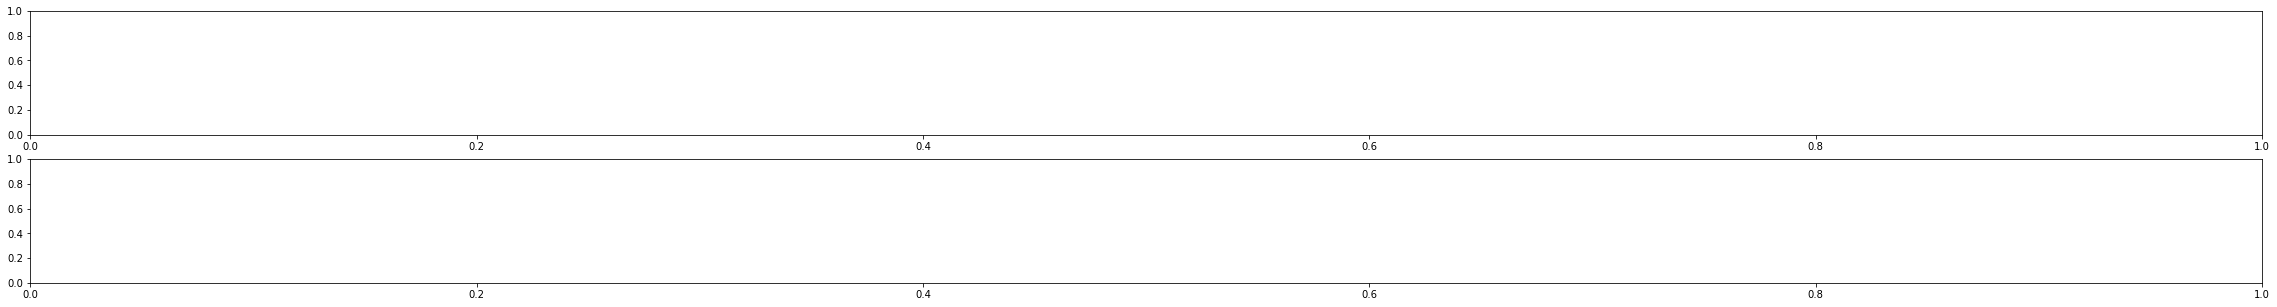

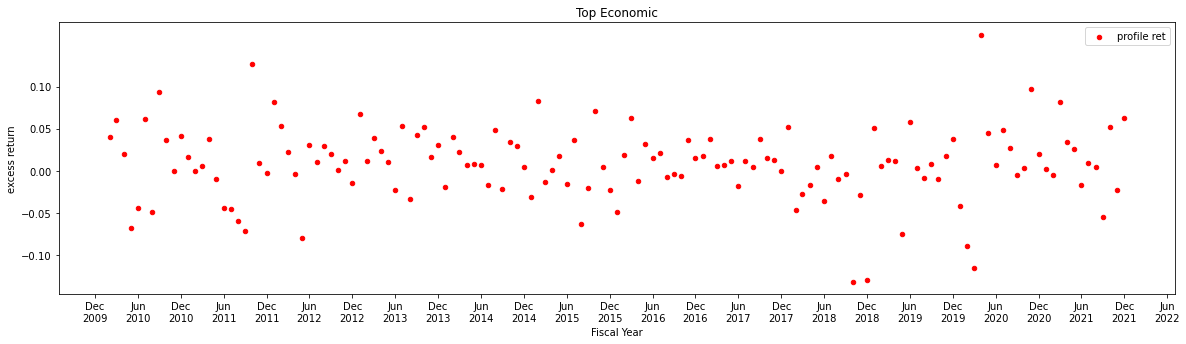

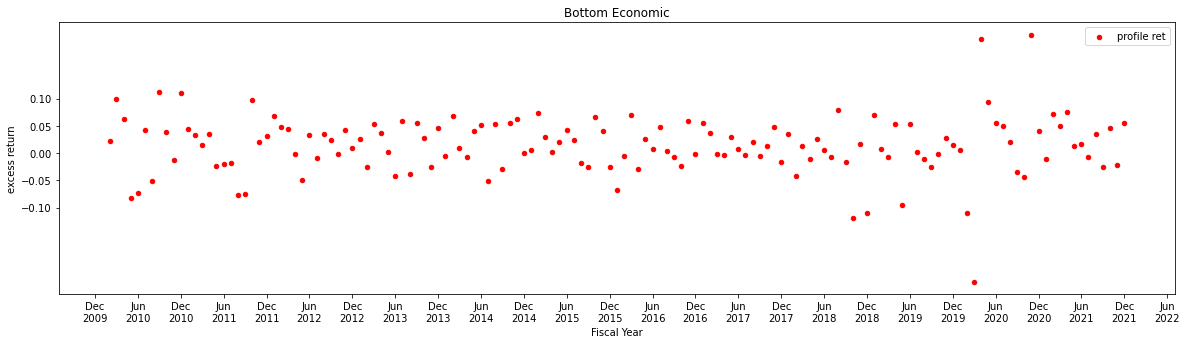

In [33]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates


fig, axes = plt.subplots(nrows=2, figsize=(40,5))

axes[0] = top_rets_df["Economic_Score"].plot(kind="scatter", x="Fiscal_Monthly",y="prof_ex_return", color="r", label="profile ret", figsize=(20,5))

loc = mdates.MonthLocator(interval=6)
axes[0].xaxis.set_major_locator(loc)
fmt = mdates.DateFormatter('%b\n%Y')
axes[0].xaxis.set_major_formatter(fmt)

axes[0].set_yticks((-.1,-.05, 0, .05, .10))

axes[0].set_xlabel("Fiscal Year")
axes[0].set_ylabel("excess return")
axes[0].set_title("Top Economic")
#plt.figure(figsize=(20,1))


axes[1] = bottom_rets_df["Economic_Score"].plot(kind="scatter", x="Fiscal_Monthly",y="prof_ex_return", color="r", label="profile ret", figsize=(20,5))

axes[1].xaxis.set_major_locator(loc)
axes[1].xaxis.set_major_formatter(fmt)
axes[1].set_yticks((-.1,-.05, 0, .05, .10))
axes[1].set_xlabel("Fiscal Year")
axes[1].set_ylabel("excess return")
axes[1].set_title("Bottom Economic")
plt.show()

In [34]:
ESGcategory

['OVerall_Score',
 'Economic_Score',
 'Environmental_Score',
 'Corporate_Governance_Score',
 'Social_Score']

In [35]:
gicSectors

#Overall"

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

## Sector (Energy) Overall Top and Bottom 

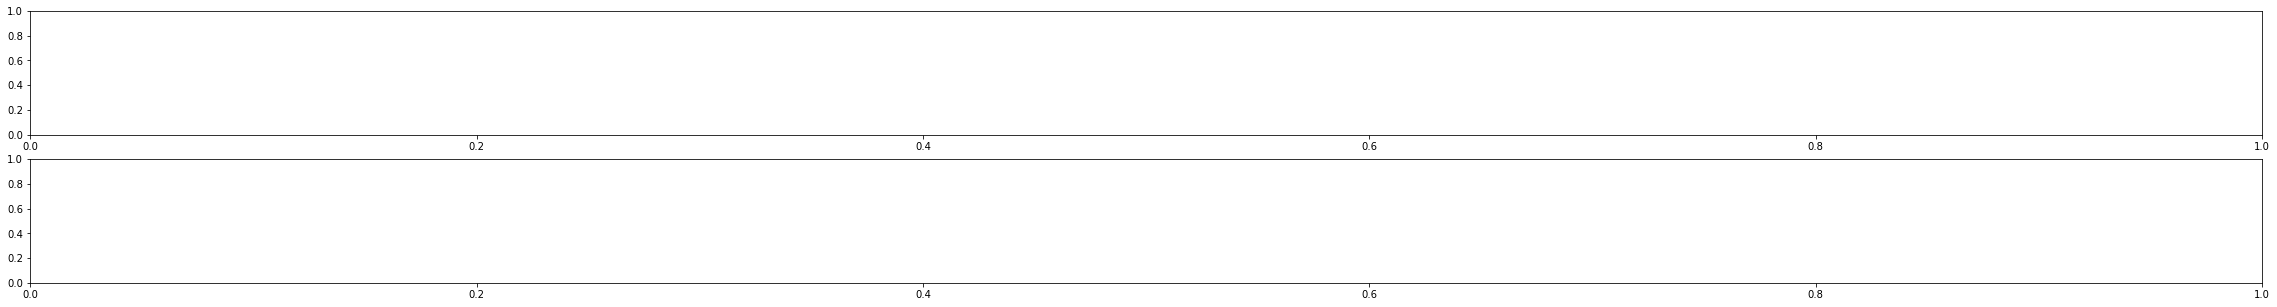

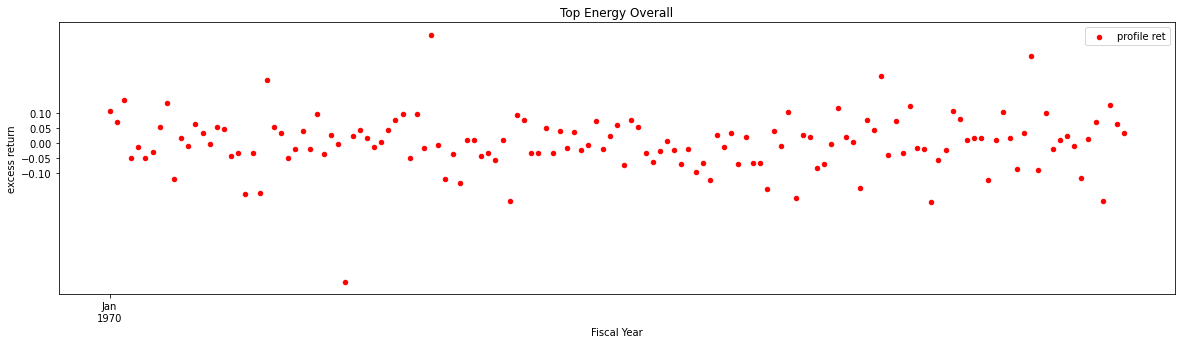

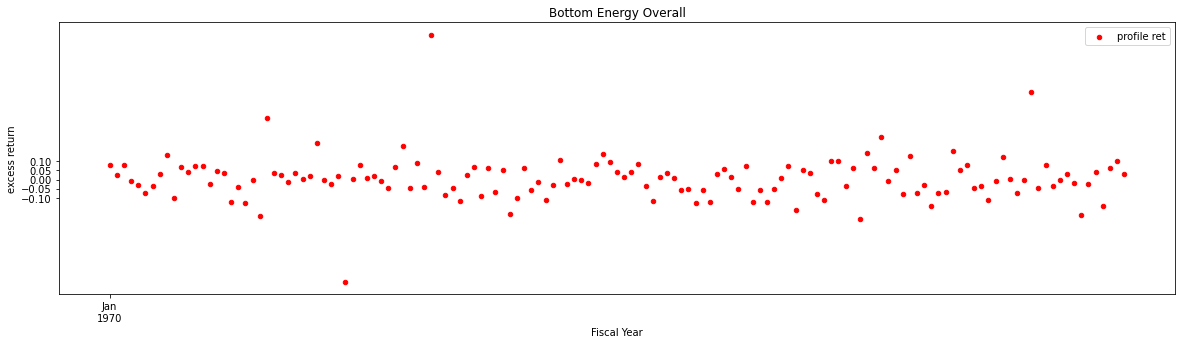

In [36]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates


fig, axes = plt.subplots(nrows=2, figsize=(40,5))

axes[0] = top_rets_dict[10]["OVerall_Score"].plot(kind="scatter", x="Fiscal_Monthly",y="prof_ex_return", color="r", label="profile ret", figsize=(20,5))

loc = mdates.MonthLocator(interval=6)
axes[0].xaxis.set_major_locator(loc)
fmt = mdates.DateFormatter('%b\n%Y')
axes[0].xaxis.set_major_formatter(fmt)

axes[0].set_yticks((-.1,-.05, 0, .05, .10))

axes[0].set_xlabel("Fiscal Year")
axes[0].set_ylabel("excess return")
axes[0].set_title("Top Energy Overall")
#plt.figure(figsize=(20,1))


axes[1] = bottom_rets_dict[10]["OVerall_Score"].plot(kind="scatter", x="Fiscal_Monthly",y="prof_ex_return", color="r", label="profile ret", figsize=(20,5))

axes[1].xaxis.set_major_locator(loc)
axes[1].xaxis.set_major_formatter(fmt)
axes[1].set_yticks((-.1,-.05, 0, .05, .10))
axes[1].set_xlabel("Fiscal Year")
axes[1].set_ylabel("excess return")
axes[1].set_title("Bottom Energy Overall")
plt.show()

## Sector (Energy) Economic Top and Bottom 

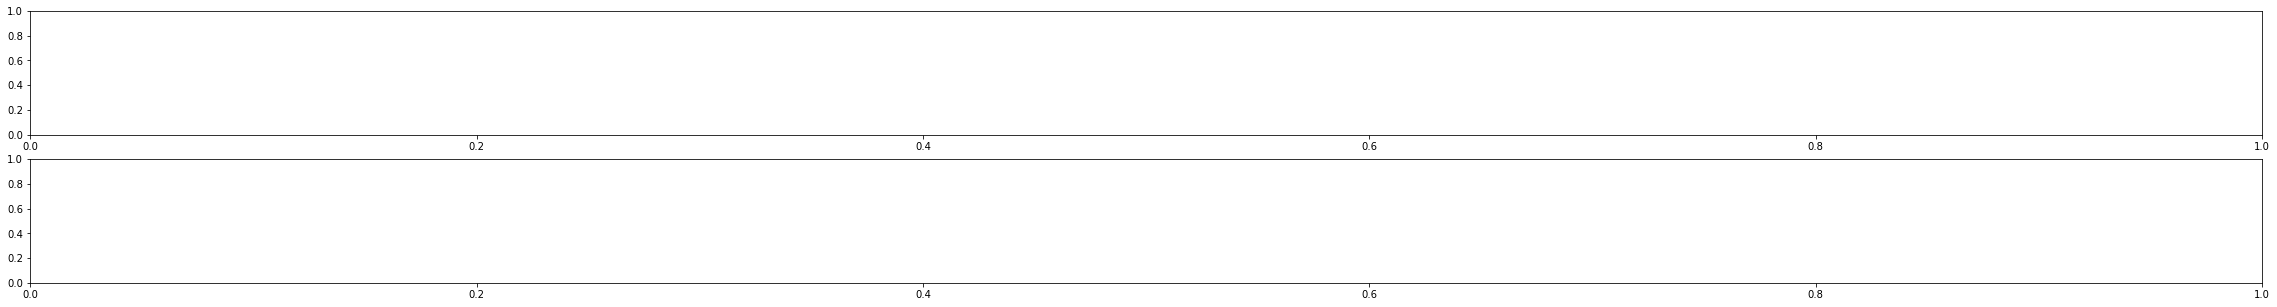

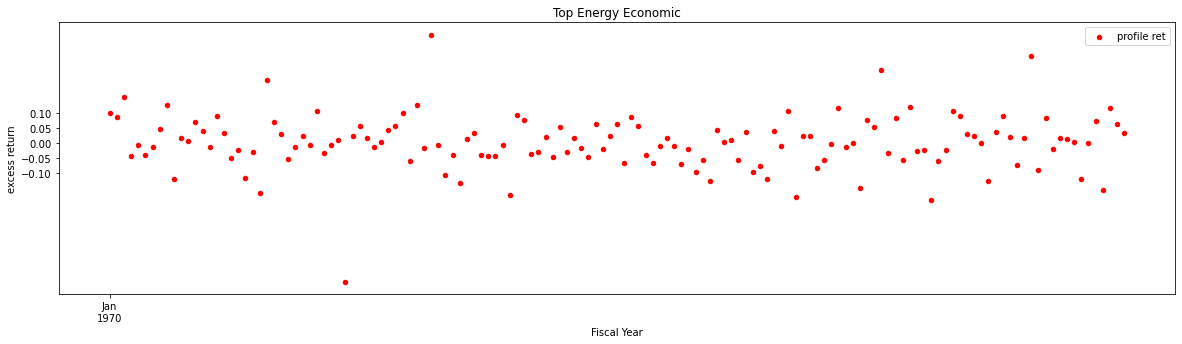

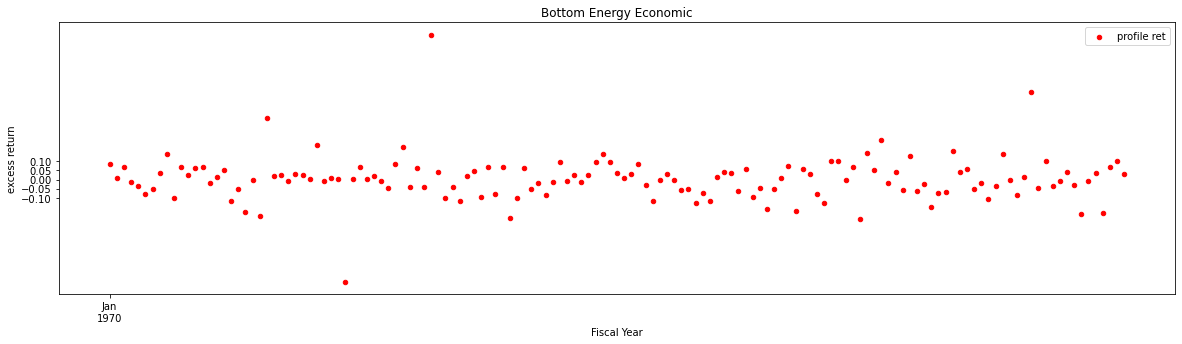

In [37]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates


fig, axes = plt.subplots(nrows=2, figsize=(40,5))

axes[0] = top_rets_dict[10]["Economic_Score"].plot(kind="scatter", x="Fiscal_Monthly",y="prof_ex_return", color="r", label="profile ret", figsize=(20,5))

loc = mdates.MonthLocator(interval=6)
axes[0].xaxis.set_major_locator(loc)
fmt = mdates.DateFormatter('%b\n%Y')
axes[0].xaxis.set_major_formatter(fmt)

axes[0].set_yticks((-.1,-.05, 0, .05, .10))

axes[0].set_xlabel("Fiscal Year")
axes[0].set_ylabel("excess return")
axes[0].set_title("Top Energy Economic")
#plt.figure(figsize=(20,1))


axes[1] = bottom_rets_dict[10]["Economic_Score"].plot(kind="scatter", x="Fiscal_Monthly",y="prof_ex_return", color="r", label="profile ret", figsize=(20,5))

axes[1].xaxis.set_major_locator(loc)
axes[1].xaxis.set_major_formatter(fmt)
axes[1].set_yticks((-.1,-.05, 0, .05, .10))
axes[1].set_xlabel("Fiscal Year")
axes[1].set_ylabel("excess return")
axes[1].set_title("Bottom Energy Economic")
plt.show()

Sector 10 Energy - top

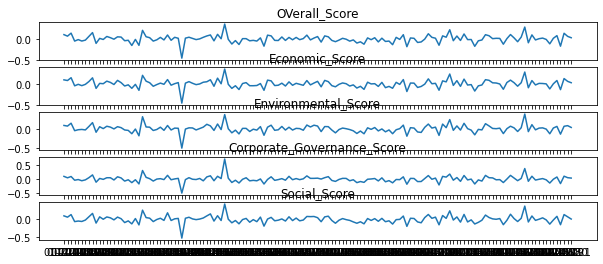

In [38]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,4))

i=0
for category in ESGcategory:
    axes[i].plot( top_rets_dict[10][category]["Fiscal_Monthly"], top_rets_dict[10][category]["profile_return"] )
    axes[i].set_title(category)
    i = i+1


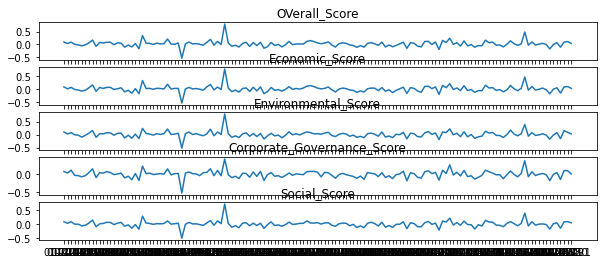

In [31]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,4))

i=0
for category in ESGcategory:
    axes[i].plot( bottom_rets_dict[10][category]["Fiscal_Monthly"], bottom_rets_dict[10][category]["profile_return"] )
    axes[i].set_title(category)
    i = i+1


Sector Energy - Top and Bottom. Top/good = left. Bottom/bad = right.

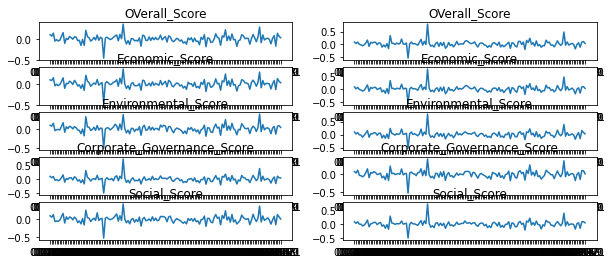

In [30]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,4))

i=0
for category in ESGcategory:
    axes[i,0].plot( top_rets_dict[10][category]["Fiscal_Monthly"], top_rets_dict[10][category]["profile_return"] )
    axes[i,0].set_title(category)
    i = i+1

i=0
for category in ESGcategory:
    axes[i,1].plot( bottom_rets_dict[10][category]["Fiscal_Monthly"], bottom_rets_dict[10][category]["profile_return"] )
    axes[i,1].set_title(category)
    i = i+1

Sector 15 Material - top

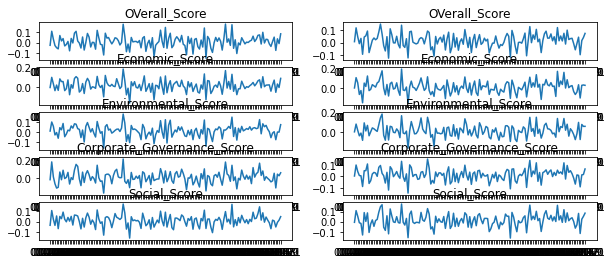

In [40]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,4))

i=0
for category in ESGcategory:
    axes[i,0].plot( top_rets_dict[15][category]["Fiscal_Monthly"], top_rets_dict[15][category]["profile_return"] )
    axes[i,0].set_title(category)
    i = i+1

i=0
for category in ESGcategory:
    axes[i,1].plot( bottom_rets_dict[15][category]["Fiscal_Monthly"], bottom_rets_dict[15][category]["profile_return"] )
    axes[i,1].set_title(category)
    i = i+1



The Overall_Score and Economic_Score are similar for their corresponding industry because when we filter by industry, we only get a handful of same companies. Then when we further filters those by the top companies, most of the time, after the filtering- the companies are the same in each index. The companies with the highest/worst esgs in one score- example Overall_score will have similar score in another category ex. evnrionmental score. In the chart below, the company Exxon Mobile is ranked 1 in the energy(sector) overall(score). The company exxon mobile is ranked 3 in Economic Score. Because our distribution assumed an equally weighted of the top companies, it doesn't matter what the company is ranked as long as it is in the top 6. Short coming of my method.

Top Energy Overall score
1- Exxon Mobile
2- Marathon Oil Corp
3- Occidental Petroleum Corp
4- Halliburton Co
5- Valero Energy Corp
6- Schlumberger LTD

Top Energy Economic Score
1- Halliburton
2- Marathon Oil Corp
3- Exxon Mobil
4- Occidental Petroleum
5- Schlumberger LTD
6- Pioneer Natural Resources CO

I am not sure why the bad overall_score and economic_score look similar to the good overall and economic score.

Bottom Energy Overall score
1- Devon Energy Corp
2- Oneck Inc
3- EOG RESOURCES INC
4- WILLIAMS COS INC
5- APA CORP
6- PIONEER NATURAL RESOURCES CO	

Bottom Energy Economic Score
1- DEVON ENERGY CORP	
2- EOG RESOURCES INC
3- VALERO ENERGY CORP
4- WILLIAMS COS INC
5- ONEOK INC
6- APA CORP

In [40]:
top_rets_dict[15]

{'OVerall_Score':     Fiscal_Monthly  profile_return  Global Index Key - Index Monthly  \
 0          01-2011       -0.025980                                 3   
 1          01-2012        0.106740                                 3   
 2          01-2013        0.032312                                 3   
 3          01-2014       -0.028436                                 3   
 4          01-2015       -0.048719                                 3   
 ..             ...             ...                               ...   
 138        12-2017        0.051341                                 3   
 139        12-2018       -0.074053                                 3   
 140        12-2019        0.035271                                 3   
 141        12-2020       -0.009571                                 3   
 142        12-2021        0.082473                                 3   
 
      Price_Close_Monthly        Index Name Index Code Type Ticker  S&P_return  \
 0                1286.

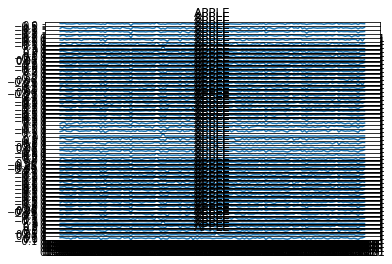

In [41]:
fig, axes = plt.subplots(nrows=55, ncols=1)

i=0
for category in ESGcategory:
    for sector in gicSectors:
        axes[i].plot( top_rets_dict[sector][category]["Fiscal_Monthly"], top_rets_dict[sector][category]["profile_return"] )
        axes[i].set_title('APPLE')
        i = i+1
        

In [42]:
top_rets_dict

{10: {'OVerall_Score':     Fiscal_Monthly  profile_return  Global Index Key - Index Monthly  \
  0          01-2011        0.108622                                 3   
  1          01-2012        0.071841                                 3   
  2          01-2013        0.144757                                 3   
  3          01-2014       -0.048033                                 3   
  4          01-2015       -0.012001                                 3   
  ..             ...             ...                               ...   
  138        12-2017        0.084210                                 3   
  139        12-2018       -0.171707                                 3   
  140        12-2019        0.141902                                 3   
  141        12-2020        0.066553                                 3   
  142        12-2021        0.033256                                 3   
  
       Price_Close_Monthly        Index Name Index Code Type Ticker  S&P_return  \
  0  

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

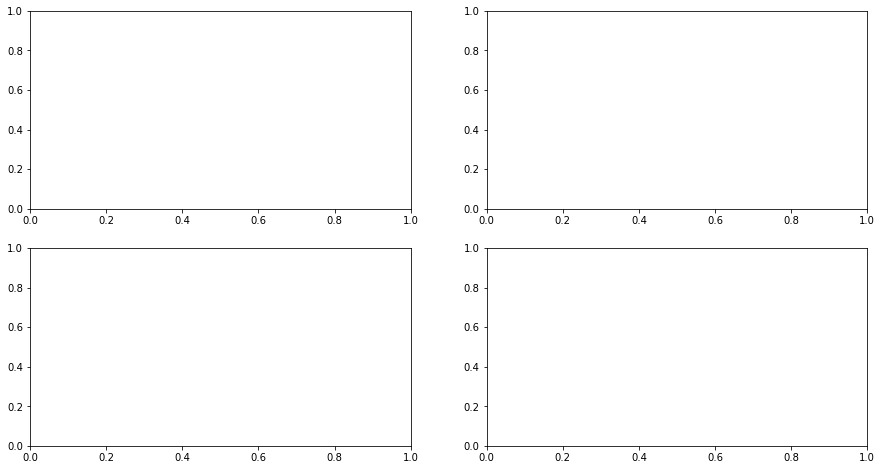

In [43]:
# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

axes[0].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0].set_title('APPLE')

axes[1].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[1].set_title('GOOGLE')

axes[2].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[2].set_title('MICROSOFT')

axes[3].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[3].set_title('AMAZON')

fig.tight_layout()

## Find a way to get all the low p-val. aka significant. Then graph it.

In [55]:
dictOfModels[10]["Economic_Score"].params

NameError: name 'dictOfModels' is not defined

## Getting the Finantial ratio

Finratio - It provides a monthly time series of financial ratios per company. Note that the book/market and ratios might not change every month. Also when you do inner join with finratio it can cause cross join.

In [ ]:
finratio = pd.read_excel(r'C:\Users\huang\Documents\esg\esg_finratio.xlsx')

In [ ]:
finratio.dtypes

In [18]:
finratio.drop(['PERMNO', 'Fiscal year end', 'Fiscal quarter end'], inplace=True, axis=1)

In [19]:
finratio.dtypes

Date                datetime64[ns]
Book/Market                float64
Return_on_Assets           float64
Return_on_Equity           float64
Ticker                      object
dtype: object

In [20]:
finratio

Date  Book/Market  Return_on_Assets  Return_on_Equity Ticker
0     2010-01-31     0.252101          0.232346          0.231894   ORCL
1     2010-02-28     0.252101          0.232346          0.231894   ORCL
2     2010-03-31     0.252101          0.232346          0.231894   ORCL
3     2010-04-30     0.233094          0.227334          0.217642   ORCL
4     2010-05-31     0.233094          0.227334          0.217642   ORCL
...          ...          ...               ...               ...    ...
62802 2021-08-31     0.037180          0.120098          0.122146   TSLA
62803 2021-09-30     0.037180          0.120098          0.122146   TSLA
62804 2021-10-31     0.037180          0.120098          0.122146   TSLA
62805 2021-11-30     0.034798          0.138650          0.160491   TSLA
62806 2021-12-31     0.034798          0.138650          0.160491   TSLA

[62807 rows x 5 columns]

In [21]:
resFINRATIO = finratio.groupby(['Ticker'], as_index=False).agg(
                      {'Book/Market':['mean','std'],'Return_on_Assets':['mean','std'], 'Return_on_Equity':['mean','std'], })

In [22]:
resFINRATIO

Ticker Book/Market           Return_on_Assets           Return_on_Equity  \
                  mean       std             mean       std             mean   
0        A    0.262016  0.070237         0.132871  0.023969         0.153388   
1       AA    1.046464  0.281302         0.073756  0.021624        -0.038073   
2      AAL    0.150776  0.063211         0.092647  0.101271        -2.707643   
3      AAP    0.286424  0.099671         0.157992  0.051047         0.225374   
4     AAPL    0.194428  0.088952         0.292430  0.069758         0.438395   
..     ...         ...       ...              ...       ...              ...   
508    XYL    0.302092  0.092239         0.127056  0.012835         0.128378   
509    YUM    0.060730  0.018160         0.362658  0.093484         1.016076   
510    ZBH    0.520459  0.072769         0.103920  0.017366         0.039391   
511   ZBRA    0.262646  0.123237         0.179342  0.041570         0.129303   
512    ZMH    0.470325  0.073161         0.196228  0.005278         0.122706   

                
           std  
0     0.079475  
1     0.094074  
2    10.006488  
3     0.104464  
4     0.229287  
..         ...  
508   0.027974  
509   1.185345  
510   0.050550  
511   0.166109  
512   0.010564  

[513 rows x 7 columns]

In [23]:
spEnv

Organization ID  Fiscal_Year  OVerall_Score  Economic_Score  \
0               10625         2012       0.903136        0.691096   
1               10625         2018       0.925016        0.961376   
2               10625         2016       0.947315        0.955375   
3               10625         2019       0.821133        0.265033   
4               10625         2011       0.955718        0.898867   
...               ...          ...            ...             ...   
3749        119901881         2014       0.473015        0.184984   
3750        119901881         2013       0.476370        0.443578   
3751        119901881         2012       0.599010        0.701873   
3752        119901881         2011       0.532595        0.525273   
3753        119901881         2010       0.470021        0.326501   

      Environmental_Score  Corporate_Governance_Score  Social_Score Ticker  
0                0.868136                    0.788041      0.933856     DE  
1                0.948539                    0.504560      0.906080     DE  
2                0.928867                    0.845178      0.911892     DE  
3                0.930694                    0.613558      0.954296     DE  
4                0.911706                    0.934404      0.940291     DE  
...                   ...                         ...           ...    ...  
3749             0.735990                    0.286304      0.736497    APA  
3750             0.677600                    0.258232      0.570717    APA  
3751             0.789849                    0.174677      0.587185    APA  
3752             0.808546                    0.220318      0.527905    APA  
3753             0.667034                    0.486223      0.445279    APA  

[3754 rows x 8 columns]

In [24]:
result = spEnv.groupby(['Ticker'], as_index=False).agg(
                      {'OVerall_Score':['mean','std'],'Economic_Score':['mean','std'], 'Environmental_Score':['mean','std'], 'Corporate_Governance_Score':['mean','std'], 'Social_Score':['mean','std']})

## Descriptive Statistics

## Issue is getting the mean and std deviation that helpful because what if the data is not normal. Such as market-value which should increase.

Panel A

For panel A, I need to excess return, market value, and books to market. compustat do not have market value and conseuqently do not have book to market. I can use td ameritrade. Compustat is missing a lot of data.

I need to research compustat and what the info means

aapl complete financial statement- 
additional detail
line 279- price-calendar year close. (322.560) 281- price fiscal year lose.
income statement (283.750)

line 99- eps= primary, excluding ei&do


aapl data and ratio
line 39- Income to commmon stock / sale =IF(ISERROR((E114-E131)/E98),#N/A,(E114-E131)/E98)
line 133- price - cal year close. (11.520) 134- price fiscal year close. (10.134)
On the google stock market chart= this is the actual stock price.


If the data cell is 0- then the value is zero.
If the data cell is #nan - then thereis an error.

#nan on the earliest year. The cell requires the data of previous year which it doesn't have ad thus error. line 42- sales/ avg total assets.
#nan on line 57 because of divide by 0.

Click on the cell then click on the triangle with exclam to see why not work.

In [25]:
test = pd.merge(resMV, resFINRATIO, how='inner')

In [26]:
test

Ticker Market_Value_-_Total_-_Fiscal                Book/Market            \
                                    mean            std        mean       std   
0        A                  20343.751908   10340.955417    0.262016  0.070237   
1      AAL                  14196.920708   11695.546782    0.150776  0.063211   
2      AAP                   9516.949275    3193.170671    0.286424  0.099671   
3     AAPL                 885681.302775  638397.977017    0.194428  0.088952   
4     ABBV                 136986.651589   50701.719795    0.079243  0.033274   
..     ...                           ...            ...         ...       ...   
442   XRAY                   9247.903642    3481.414325    0.470421  0.106237   
443    XYL                  10630.350173    5618.320908    0.302092  0.092239   
444    YUM                  29709.192500    4758.822648    0.060730  0.018160   
445    ZBH                  20249.709917    7490.350129    0.520459  0.072769   
446   ZBRA                   8425.794950    9266.547491    0.262646  0.123237   

    Return_on_Assets           Return_on_Equity             
                mean       std             mean        std  
0           0.132871  0.023969         0.153388   0.079475  
1           0.092647  0.101271        -2.707643  10.006488  
2           0.157992  0.051047         0.225374   0.104464  
3           0.292430  0.069758         0.438395   0.229287  
4           0.226613  0.042418         0.634160   0.196279  
..               ...       ...              ...        ...  
442         0.107831  0.024777         0.053316   0.110094  
443         0.127056  0.012835         0.128378   0.027974  
444         0.362658  0.093484         1.016076   1.185345  
445         0.103920  0.017366         0.039391   0.050550  
446         0.179342  0.041570         0.129303   0.166109  

[447 rows x 9 columns]

Panel B

In [27]:
result

Ticker OVerall_Score           Economic_Score            \
                       mean       std           mean       std   
0    03209410      0.563847  0.254578       0.543634  0.275023   
1           A      0.963400  0.009730       0.955554  0.028540   
2        AAPL      0.757754  0.111641       0.388853  0.258478   
3        ABMD      0.245193  0.123777       0.492026  0.341353   
4         ABT      0.934383  0.033947       0.803857  0.199710   
..        ...           ...       ...            ...       ...   
323       XOM      0.793907  0.218334       0.629735  0.354582   
324      XRAY      0.630974  0.179431       0.529749  0.128388   
325       YUM      0.844066  0.073866       0.590645  0.302340   
326      ZBRA      0.636738  0.151030       0.739045  0.146148   
327      ZION      0.447621  0.225655       0.513498  0.272156   

    Environmental_Score           Corporate_Governance_Score            \
                   mean       std                       mean       std   
0              0.414506  0.360327                   0.838814  0.120466   
1              0.935881  0.013547                   0.891753  0.031669   
2              0.922394  0.014390                   0.872412  0.075975   
3              0.111940  0.019483                   0.555266  0.156519   
4              0.885276  0.059597                   0.927428  0.036897   
..                  ...       ...                        ...       ...   
323            0.910563  0.021913                   0.600804  0.269441   
324            0.485024  0.184944                   0.613290  0.088799   
325            0.732014  0.080612                   0.829465  0.082779   
326            0.245575  0.129118                   0.714640  0.109399   
327            0.192007  0.216500                   0.715691  0.065846   

    Social_Score            
            mean       std  
0       0.356627  0.215990  
1       0.934045  0.025437  
2       0.543339  0.154682  
3       0.138142  0.036008  
4       0.862833  0.107568  
..           ...       ...  
323     0.850810  0.123050  
324     0.681780  0.175069  
325     0.871282  0.045485  
326     0.631508  0.123986  
327     0.388656  0.164549  

[328 rows x 11 columns]

In [29]:
test = pd.merge(industrySec, finratio, how='inner')

NameError: name 'industrySec' is not defined

In [29]:
test

Ticker Market_Value_-_Total_-_Fiscal                Book/Market            \
                                    mean            std        mean       std   
0        A                  20343.751908   10340.955417    0.262016  0.070237   
1      AAL                  14196.920708   11695.546782    0.150776  0.063211   
2      AAP                   9516.949275    3193.170671    0.286424  0.099671   
3     AAPL                 885681.302775  638397.977017    0.194428  0.088952   
4     ABBV                 136986.651589   50701.719795    0.079243  0.033274   
..     ...                           ...            ...         ...       ...   
442   XRAY                   9247.903642    3481.414325    0.470421  0.106237   
443    XYL                  10630.350173    5618.320908    0.302092  0.092239   
444    YUM                  29709.192500    4758.822648    0.060730  0.018160   
445    ZBH                  20249.709917    7490.350129    0.520459  0.072769   
446   ZBRA                   8425.794950    9266.547491    0.262646  0.123237   

    Return_on_Assets           Return_on_Equity             
                mean       std             mean        std  
0           0.132871  0.023969         0.153388   0.079475  
1           0.092647  0.101271        -2.707643  10.006488  
2           0.157992  0.051047         0.225374   0.104464  
3           0.292430  0.069758         0.438395   0.229287  
4           0.226613  0.042418         0.634160   0.196279  
..               ...       ...              ...        ...  
442         0.107831  0.024777         0.053316   0.110094  
443         0.127056  0.012835         0.128378   0.027974  
444         0.362658  0.093484         1.016076   1.185345  
445         0.103920  0.017366         0.039391   0.050550  
446         0.179342  0.041570         0.129303   0.166109  

[447 rows x 9 columns]

In [30]:
industrySec.join(finratio, on='Ticker Symbol')

NameError: name 'industrySec' is not defined

In [31]:
finance = pd.read_excel(r'C:\Users\huang\Documents\esg\s&p500data_and_ratio.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\huang\\Documents\\esg\\s&p500data_and_ratio.xlsx'

In [30]:
finance

NameError: name 'finance' is not defined

## Issue
I am missing a lot of s&p500 companies. I only got 328 companies but I searched for 500 companies.

In [33]:
test = pd.merge(df, industry, how='inner')

NameError: name 'df' is not defined

In [34]:
test

Ticker Market_Value_-_Total_-_Fiscal                Book/Market            \
                                    mean            std        mean       std   
0        A                  20343.751908   10340.955417    0.262016  0.070237   
1      AAL                  14196.920708   11695.546782    0.150776  0.063211   
2      AAP                   9516.949275    3193.170671    0.286424  0.099671   
3     AAPL                 885681.302775  638397.977017    0.194428  0.088952   
4     ABBV                 136986.651589   50701.719795    0.079243  0.033274   
..     ...                           ...            ...         ...       ...   
442   XRAY                   9247.903642    3481.414325    0.470421  0.106237   
443    XYL                  10630.350173    5618.320908    0.302092  0.092239   
444    YUM                  29709.192500    4758.822648    0.060730  0.018160   
445    ZBH                  20249.709917    7490.350129    0.520459  0.072769   
446   ZBRA                   8425.794950    9266.547491    0.262646  0.123237   

    Return_on_Assets           Return_on_Equity             
                mean       std             mean        std  
0           0.132871  0.023969         0.153388   0.079475  
1           0.092647  0.101271        -2.707643  10.006488  
2           0.157992  0.051047         0.225374   0.104464  
3           0.292430  0.069758         0.438395   0.229287  
4           0.226613  0.042418         0.634160   0.196279  
..               ...       ...              ...        ...  
442         0.107831  0.024777         0.053316   0.110094  
443         0.127056  0.012835         0.128378   0.027974  
444         0.362658  0.093484         1.016076   1.185345  
445         0.103920  0.017366         0.039391   0.050550  
446         0.179342  0.041570         0.129303   0.166109  

[447 rows x 9 columns]

Use GIC Subsectors to divide to capital, consumption, financial, other/misc.
Maybe use GIC Subsubsectors

## Issue
Using GIC sectors do not divide to capital, consumption, financial, other/misc perfectly.
The consumer discretionary includes categories in capital, consumption, and financial such as automobiles-capital- and education services- diversified consumer services.


In [35]:
# capital (e.g. automobiles,construction, machinery), consumption (e.g. food producers, retailers, media), financial (e.g. banks, insurance, real estate) and
# other/miscellaneous (e.g. chemicals, pharmaceuticals, commodities) goods/services

thisdict = {
  "Energy": "Ford Motor Company",
  "Materials": "Mustang",
  "Industrials": 1964
}

# create new column using ditionary mapping
df['Is_adult'] = df['GICS_SECTOR'].map({"Energy": "other/miscellaneous", #commodities
                                        "Materials": "other/miscellaneous", #commodities
                                        })
# display the dataframe
print(df)

NameError: name 'df' is not defined

In [5]:
test.describe

<bound method NDFrame.describe of      Organization_ID  Fiscal_Year  Overall_Score  Economic_Score  \
0              16597         2006       0.976100        0.930879   
1              16597         2019       0.896075        0.404126   
2              16597         2008       0.955205        0.884321   
3              16597         2014       0.900058        0.698825   
4              16597         2018       0.925925        0.680762   
5              16597         2016       0.949079        0.948000   
6              16597         2009       0.952660        0.946317   
7              16597         2011       0.921194        0.816280   
8              16597         2020       0.907602        0.418292   
9              16597         2013       0.927264        0.918002   
10             16597         2007       0.954652        0.862713   
11             16597         2010       0.944268        0.905529   
12             16597         2015       0.952096        0.917979   
13            

In [28]:
spEnv

Organization ID  Fiscal_Year  OVerall_Score  Economic_Score  \
0               10625         2012       0.903136        0.691096   
1               10625         2018       0.925016        0.961376   
2               10625         2016       0.947315        0.955375   
3               10625         2019       0.821133        0.265033   
4               10625         2011       0.955718        0.898867   
...               ...          ...            ...             ...   
3749        119901881         2014       0.473015        0.184984   
3750        119901881         2013       0.476370        0.443578   
3751        119901881         2012       0.599010        0.701873   
3752        119901881         2011       0.532595        0.525273   
3753        119901881         2010       0.470021        0.326501   

      Environmental_Score  Corporate_Governance_Score  Social_Score Ticker  
0                0.868136                    0.788041      0.933856     DE  
1                0.948539                    0.504560      0.906080     DE  
2                0.928867                    0.845178      0.911892     DE  
3                0.930694                    0.613558      0.954296     DE  
4                0.911706                    0.934404      0.940291     DE  
...                   ...                         ...           ...    ...  
3749             0.735990                    0.286304      0.736497    APA  
3750             0.677600                    0.258232      0.570717    APA  
3751             0.789849                    0.174677      0.587185    APA  
3752             0.808546                    0.220318      0.527905    APA  
3753             0.667034                    0.486223      0.445279    APA  

[3754 rows x 8 columns]

In [29]:
col = ["Ticker", "Fiscal_Year"]
spEnv = spEnv.sort_values(col, ascending=[True, True])

In [30]:
spEnv

Organization ID  Fiscal_Year  OVerall_Score  Economic_Score  \
2450            48467         2010       0.363280        0.759038   
2449            48467         2011       0.309009        0.636221   
2448            48467         2012       0.269470        0.439095   
2439            48467         2013       0.220058        0.273773   
2446            48467         2014       0.401745        0.678811   
...               ...          ...            ...             ...   
3470        100005600         2017       0.568529        0.713289   
3469        100005600         2018       0.586947        0.816578   
3468        100005600         2019       0.551764        0.189026   
3467        100005600         2020       0.829067        0.880954   
3466        100005600         2021       0.787446        0.824891   

      Environmental_Score  Corporate_Governance_Score  Social_Score    Ticker  
2450             0.098233                    0.639201      0.162103  03209410  
2449             0.096166                    0.639675      0.135970  03209410  
2448             0.101206                    0.730674      0.134974  03209410  
2439             0.103698                    0.750450      0.134698  03209410  
2446             0.104584                    0.841276      0.143466  03209410  
...                   ...                         ...           ...       ...  
3470             0.114898                    0.741990      0.585551      ZION  
3469             0.095160                    0.621217      0.664950      ZION  
3468             0.637682                    0.762513      0.524437      ZION  
3467             0.621004                    0.844961      0.500651      ZION  
3466                  NaN                    0.789542      0.487101      ZION  

[3754 rows x 8 columns]

ISSUE: AAPL: 2005-2020. AMZN: 2002-2020.

ISSUE: I am missing a lot of data.

I can get more data beyond 2020. My wrds query is 2002-2020, but appl starts 2005. I can limited the data from a certain year to another year. I need to check the minimumm year.

CapM beta = slope = .7524
Capm alpha = intercept = 3.7367

# Apply test code A to the portfolio generated below. You should get top portfolio's annual overall esg return for 2011-2020. Then, we need to repeat the overall esg but for overall_score, economic_score, environmental_score, corp_gov, social_score. Finally, using s&p500 annualized return and the top profile's annualied return run a linear regression to get the alpha and beta score. 

# With the alpha, we can see how much better the top profile financial performance to the s&p500. We use sigtest to see if the difference is significance. 

# We then can expand it to different industry.

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

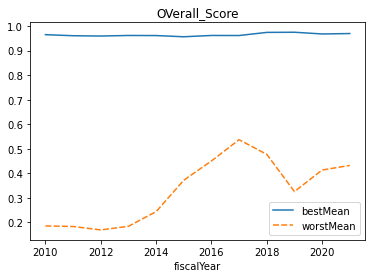

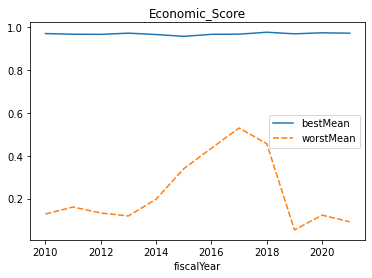

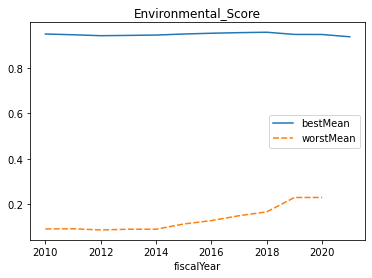

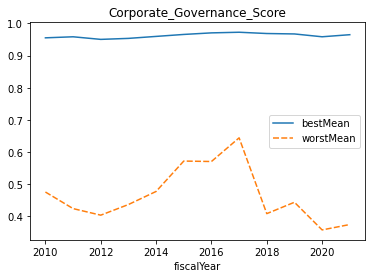

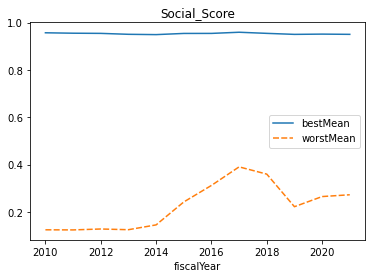

In [42]:
ESGcategory = ["OVerall_Score", "Economic_Score", "Environmental_Score", "Corporate_Governance_Score", "Social_Score"]
for category in ESGcategory: 
    fiscalYear =[]
    bestMean = []
    worstMean = []
    for year in range(2010,2022):
        fiscalYear.append(year)
        b = testa[testa["Fiscal_Year"] == year]
        b = b.sort_values(category, ascending=False)
        top = b.head(20)   #portfolio of highest esg given year and category
        bestMean.append(top[category].mean())
        bottom = b.tail(20)   #portfolio of highest esg given year and category
        worstMean.append(bottom[category].mean())
    data = {'fiscalYear': fiscalYear, 'bestMean': bestMean, 'worstMean': worstMean}
    dfa = pd.DataFrame.from_dict(data)    
    dfa.set_index('fiscalYear', inplace=True)
    plt.figure()
    chart = sns.lineplot(data=dfa)
    chart.set(title=category)

The benchmark portfolios are simple equally weighted portfolios comprising all stocks of the
relevant stock universe. Thus,they represent typical passive investments in broad stock market or industry indices. 
It contains all 328 stocks of the s&p500

In [93]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data)

col_1 col_2
0      3     a
1      2     b
2      1     c
3      0     d

In [ ]:
testa[testa["Fiscal_Year"] == 2013]

In [ ]:


col = ["Ticker", "Fiscal Year"]
spEnv = spEnv.sort_values(col, ascending=[True, True])

## If I use 2015 I get more stocks. If I use 2010 I get less stocks. I need this information calculate correlation. I think the year range is more important than the thirty stock. I am not sur if they have missing data.

In [13]:
correlation =df[df['Fiscal_Year']>2005]

In [14]:
correlation.Fiscal_Year.value_counts()

2006    8
2007    8
2008    8
2009    8
2010    8
2011    8
2012    8
2013    8
2014    8
2015    8
2016    8
2017    8
2018    8
2019    8
2020    8
Name: Fiscal_Year, dtype: int64

In [15]:
correlation

Organization_ID  Fiscal_Year  Overall_Score  Economic_Score  \
60             19775         2006       0.856255        0.721861   
58             19775         2007       0.822734        0.733197   
57             19775         2008       0.681344        0.182789   
55             19775         2009       0.777254        0.610595   
54             19775         2010       0.721670        0.487619   
56             19775         2011       0.580671        0.146076   
59             19775         2012       0.833192        0.695548   
62             19775         2013       0.782815        0.532954   
69             19775         2014       0.686277        0.311156   
68             19775         2015       0.845909        0.538683   
67             19775         2016       0.874447        0.647646   
66             19775         2017       0.870488        0.510405   
65             19775         2018       0.813379        0.412118   
64             19775         2019       0.945695        0.824453   
63             19775         2020       0.943458        0.811652   
141           114492         2006       0.354358        0.700942   
140           114492         2007       0.521997        0.820945   
139           114492         2008       0.453099        0.895913   
138           114492         2009       0.399013        0.761470   
136           114492         2010       0.482901        0.861580   
135           114492         2011       0.413359        0.609733   
134           114492         2012       0.296122        0.245782   
133           114492         2013       0.245742        0.245979   
132           114492         2014       0.383676        0.338658   
131           114492         2015       0.636816        0.623152   
130           114492         2016       0.757234        0.879592   
137           114492         2017       0.804024        0.624320   
129           114492         2018       0.950546        0.890904   
128           114492         2019       0.633830        0.036620   
127           114492         2020       0.648268        0.042658   
23             18198         2006       0.844954        0.453361   
19             18198         2007       0.834992        0.872754   
27             18198         2008       0.889381        0.535901   
21             18198         2009       0.896951        0.692353   
20             18198         2010       0.925812        0.610091   
24             18198         2011       0.947580        0.858383   
28             18198         2012       0.913553        0.664923   
18             18198         2013       0.947182        0.857614   
17             18198         2014       0.925862        0.774083   
16             18198         2015       0.913124        0.568094   
26             18198         2016       0.947062        0.851375   
34             18198         2017       0.949754        0.924447   
32             18198         2018       0.877157        0.712637   
33             18198         2019       0.950867        0.944160   
30             18198         2020       0.959568        0.944426   
103            27965         2006       0.881525        0.797336   
102            27965         2007       0.733398        0.391871   
99             27965         2008       0.824140        0.661814   
98             27965         2009       0.847044        0.633581   
97             27965         2010       0.741624        0.270482   
96             27965         2011       0.864979        0.577264   
95             27965         2012       0.859962        0.693680   
94             27965         2013       0.753047        0.330607   
93             27965         2014       0.826013        0.514836   
100            27965         2015       0.908880        0.771917   
92             27965         2016       0.914774        0.841844   
91             27965         2017       0.919806        0.782636   
90             27965         2018       0.910988        0.838

In [16]:
#WHEN YOU CALCULATE CORRELATION, the order matter. x=1,2,3. y=1,2,3 . corr = 1/    x=3,2,1 y=1,2,3 . corr = -1
# I ordered it incrementally. 2001 -> 2020. Earlier.


col = ["Ticker", "Fiscal_Year"]
assendDF = correlation.sort_values(col, ascending=[True, True])

## ISSUE How to treat NaN?

In [17]:
correlation

Organization_ID  Fiscal_Year  Overall_Score  Economic_Score  \
60             19775         2006       0.856255        0.721861   
58             19775         2007       0.822734        0.733197   
57             19775         2008       0.681344        0.182789   
55             19775         2009       0.777254        0.610595   
54             19775         2010       0.721670        0.487619   
56             19775         2011       0.580671        0.146076   
59             19775         2012       0.833192        0.695548   
62             19775         2013       0.782815        0.532954   
69             19775         2014       0.686277        0.311156   
68             19775         2015       0.845909        0.538683   
67             19775         2016       0.874447        0.647646   
66             19775         2017       0.870488        0.510405   
65             19775         2018       0.813379        0.412118   
64             19775         2019       0.945695        0.824453   
63             19775         2020       0.943458        0.811652   
141           114492         2006       0.354358        0.700942   
140           114492         2007       0.521997        0.820945   
139           114492         2008       0.453099        0.895913   
138           114492         2009       0.399013        0.761470   
136           114492         2010       0.482901        0.861580   
135           114492         2011       0.413359        0.609733   
134           114492         2012       0.296122        0.245782   
133           114492         2013       0.245742        0.245979   
132           114492         2014       0.383676        0.338658   
131           114492         2015       0.636816        0.623152   
130           114492         2016       0.757234        0.879592   
137           114492         2017       0.804024        0.624320   
129           114492         2018       0.950546        0.890904   
128           114492         2019       0.633830        0.036620   
127           114492         2020       0.648268        0.042658   
23             18198         2006       0.844954        0.453361   
19             18198         2007       0.834992        0.872754   
27             18198         2008       0.889381        0.535901   
21             18198         2009       0.896951        0.692353   
20             18198         2010       0.925812        0.610091   
24             18198         2011       0.947580        0.858383   
28             18198         2012       0.913553        0.664923   
18             18198         2013       0.947182        0.857614   
17             18198         2014       0.925862        0.774083   
16             18198         2015       0.913124        0.568094   
26             18198         2016       0.947062        0.851375   
34             18198         2017       0.949754        0.924447   
32             18198         2018       0.877157        0.712637   
33             18198         2019       0.950867        0.944160   
30             18198         2020       0.959568        0.944426   
103            27965         2006       0.881525        0.797336   
102            27965         2007       0.733398        0.391871   
99             27965         2008       0.824140        0.661814   
98             27965         2009       0.847044        0.633581   
97             27965         2010       0.741624        0.270482   
96             27965         2011       0.864979        0.577264   
95             27965         2012       0.859962        0.693680   
94             27965         2013       0.753047        0.330607   
93             27965         2014       0.826013        0.514836   
100            27965         2015       0.908880        0.771917   
92             27965         2016       0.914774        0.841844   
91             27965         2017       0.919806        0.782636   
90             27965         2018       0.910988        0.838

In [19]:
correlation = correlation.drop(["Organization_ID", "Overall_Score", "Fiscal_Year"], axis = 1)

In [20]:

# creation of correlation matrix
corrM = correlation.corr()
 
corrM

Economic_Score  Environmental_Score  \
Economic_Score                    1.000000            -0.005878   
Environmental_Score              -0.005878             1.000000   
Corporate_Governance_Score        0.098430             0.293314   
Social_Score                      0.284025             0.687732   

                            Corporate_Governance_Score  Social_Score  
Economic_Score                                0.098430      0.284025  
Environmental_Score                           0.293314      0.687732  
Corporate_Governance_Score                    1.000000      0.165756  
Social_Score                                  0.165756      1.000000

In [21]:
assendDF

Organization_ID  Fiscal_Year  Overall_Score  Economic_Score  \
60             19775         2006       0.856255        0.721861   
58             19775         2007       0.822734        0.733197   
57             19775         2008       0.681344        0.182789   
55             19775         2009       0.777254        0.610595   
54             19775         2010       0.721670        0.487619   
56             19775         2011       0.580671        0.146076   
59             19775         2012       0.833192        0.695548   
62             19775         2013       0.782815        0.532954   
69             19775         2014       0.686277        0.311156   
68             19775         2015       0.845909        0.538683   
67             19775         2016       0.874447        0.647646   
66             19775         2017       0.870488        0.510405   
65             19775         2018       0.813379        0.412118   
64             19775         2019       0.945695        0.824453   
63             19775         2020       0.943458        0.811652   
141           114492         2006       0.354358        0.700942   
140           114492         2007       0.521997        0.820945   
139           114492         2008       0.453099        0.895913   
138           114492         2009       0.399013        0.761470   
136           114492         2010       0.482901        0.861580   
135           114492         2011       0.413359        0.609733   
134           114492         2012       0.296122        0.245782   
133           114492         2013       0.245742        0.245979   
132           114492         2014       0.383676        0.338658   
131           114492         2015       0.636816        0.623152   
130           114492         2016       0.757234        0.879592   
137           114492         2017       0.804024        0.624320   
129           114492         2018       0.950546        0.890904   
128           114492         2019       0.633830        0.036620   
127           114492         2020       0.648268        0.042658   
23             18198         2006       0.844954        0.453361   
19             18198         2007       0.834992        0.872754   
27             18198         2008       0.889381        0.535901   
21             18198         2009       0.896951        0.692353   
20             18198         2010       0.925812        0.610091   
24             18198         2011       0.947580        0.858383   
28             18198         2012       0.913553        0.664923   
18             18198         2013       0.947182        0.857614   
17             18198         2014       0.925862        0.774083   
16             18198         2015       0.913124        0.568094   
26             18198         2016       0.947062        0.851375   
34             18198         2017       0.949754        0.924447   
32             18198         2018       0.877157        0.712637   
33             18198         2019       0.950867        0.944160   
30             18198         2020       0.959568        0.944426   
103            27965         2006       0.881525        0.797336   
102            27965         2007       0.733398        0.391871   
99             27965         2008       0.824140        0.661814   
98             27965         2009       0.847044        0.633581   
97             27965         2010       0.741624        0.270482   
96             27965         2011       0.864979        0.577264   
95             27965         2012       0.859962        0.693680   
94             27965         2013       0.753047        0.330607   
93             27965         2014       0.826013        0.514836   
100            27965         2015       0.908880        0.771917   
92             27965         2016       0.914774        0.841844   
91             27965         2017       0.919806        0.782636   
90             27965         2018       0.910988        0.838

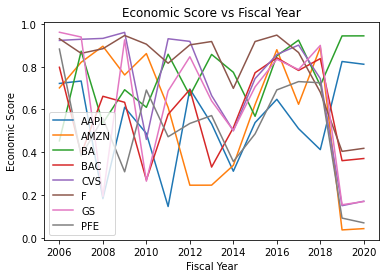

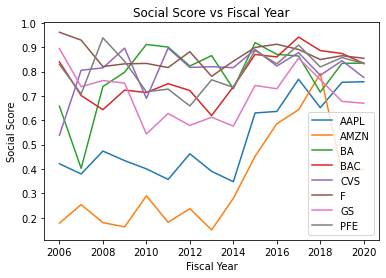

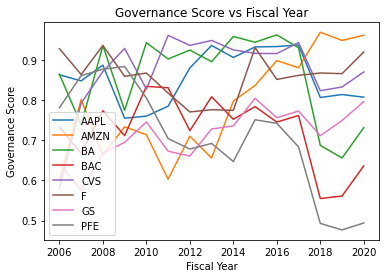

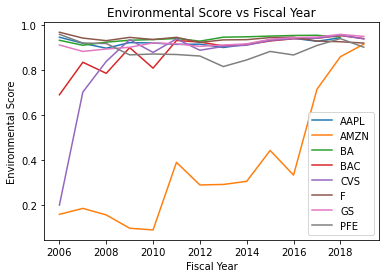

In [30]:
import matplotlib.pyplot as plt
def plotEconTicker (ticker):
    plt.plot(assendDF.loc[assendDF["Ticker"] == "AAPL"].Fiscal_Year, assendDF.loc[assendDF["Ticker"] == ticker].Economic_Score, label=ticker)

def plotSocTicker (ticker):
    plt.plot(assendDF.loc[assendDF["Ticker"] == "AAPL"].Fiscal_Year, assendDF.loc[assendDF["Ticker"] == ticker].Social_Score, label=ticker)

def plotGovTicker (ticker):
    plt.plot(assendDF.loc[assendDF["Ticker"] == "AAPL"].Fiscal_Year, assendDF.loc[assendDF["Ticker"] == ticker].Corporate_Governance_Score, label=ticker)

def plotEnvTicker (ticker):
    plt.plot(assendDF.loc[assendDF["Ticker"] == "AAPL"].Fiscal_Year, assendDF.loc[assendDF["Ticker"] == ticker].Environmental_Score, label=ticker)

    
    
plt.xlabel("Fiscal Year")
plt.ylabel("Economic Score")
plt.title("Economic Score vs Fiscal Year")
for x in df['Ticker'].unique():
    plotEconTicker(x) 

plt.legend()
plt.show()



plt.xlabel("Fiscal Year")
plt.ylabel("Social Score")
plt.title("Social Score vs Fiscal Year")
for x in df['Ticker'].unique():
    plotSocTicker(x) 

plt.legend()
plt.show()



plt.xlabel("Fiscal Year")
plt.ylabel("Governance Score")
plt.title("Governance Score vs Fiscal Year")
for x in df['Ticker'].unique():
    plotGovTicker(x) 

plt.legend()
plt.show()



plt.xlabel("Fiscal Year")
plt.ylabel("Environmental Score")
plt.title("Environmental Score vs Fiscal Year")
for x in df['Ticker'].unique():
    plotEnvTicker(x) 

plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(6, 4))

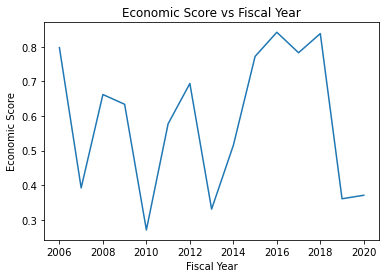

In [25]:
#assendDF.loc[assendDF["Ticker"] == "AAPL"]

#plt.plot(assendDF.loc[assendDF["Ticker"] == "AAPL"].Fiscal_Year, assendDF.loc[assendDF["Ticker"] == "AAPL"].Economic_Score)
#plt.plot(assendDF.loc[assendDF["Ticker"] == "AAPL"].Fiscal_Year, assendDF.loc[assendDF["Ticker"] == "AMZN"].Economic_Score)
plt.plot(assendDF.loc[assendDF["Ticker"] == "AAPL"].Fiscal_Year, assendDF.loc[assendDF["Ticker"] == "BAC"].Economic_Score, label="test")
plt.xlabel("Fiscal Year")
plt.ylabel("Economic Score")
plt.title("Economic Score vs Fiscal Year")
plt.show()

In [25]:

assendDF.loc[assendDF["Ticker"] == "AAPL"]

Organization_ID  Fiscal_Year  Overall_Score  Economic_Score  \
60            19775         2006       0.856255        0.721861   
58            19775         2007       0.822734        0.733197   
57            19775         2008       0.681344        0.182789   
55            19775         2009       0.777254        0.610595   
54            19775         2010       0.721670        0.487619   
56            19775         2011       0.580671        0.146076   
59            19775         2012       0.833192        0.695548   
62            19775         2013       0.782815        0.532954   
69            19775         2014       0.686277        0.311156   
68            19775         2015       0.845909        0.538683   
67            19775         2016       0.874447        0.647646   
66            19775         2017       0.870488        0.510405   
65            19775         2018       0.813379        0.412118   
64            19775         2019       0.945695        0.824453   
63            19775         2020       0.943458        0.811652   

    Environmental_Score  Corporate_Governance_Score  Social_Score Ticker  
60             0.945487                    0.862890      0.421493   AAPL  
58             0.918597                    0.847698      0.379452   AAPL  
57             0.896761                    0.886872      0.473494   AAPL  
55             0.921673                    0.754737      0.434182   AAPL  
54             0.919899                    0.759909      0.400464   AAPL  
56             0.913764                    0.784716      0.356969   AAPL  
59             0.914733                    0.879938      0.462449   AAPL  
62             0.899887                    0.935924      0.390357   AAPL  
69             0.913908                    0.905944      0.347720   AAPL  
68             0.933855                    0.932225      0.630030   AAPL  
67             0.940916                    0.933142      0.636277   AAPL  
66             0.927447                    0.937068      0.768362   AAPL  
65             0.942945                    0.806377      0.651678   AAPL  
64                  NaN                    0.813715      0.756104   AAPL  
63                  NaN                    0.807108      0.758075   AAPL

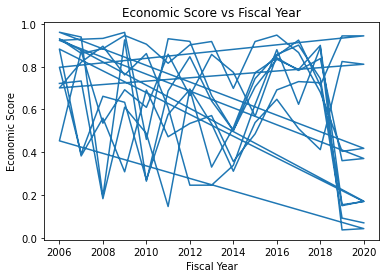

In [21]:
import matplotlib.pyplot as plt
plt.plot(assendDF.Fiscal_Year, assendDF.Economic_Score)
plt.xlabel("Fiscal Year")
plt.ylabel("Economic Score")
plt.title("Economic Score vs Fiscal Year")
plt.show()

In [42]:
# obtaining the data
data = {'A': [3,2,1],
        'B': [1, 2, 3]
       }
# creation of DataFrame
df = pd.DataFrame(data)
 
# creation of correlation matrix
corrM = df.corr()
 
corrM

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [47]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})
df['date'] = pd.to_datetime(df['date'])
df
df["date"]

df

0   2000-03-10
1   2000-03-11
2   2000-03-12
Name: date, dtype: datetime64[ns]